<a href="https://colab.research.google.com/github/damjag1992/damjag1992-Disease-prediction-model/blob/main/Disease_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import of necessary libraries and functions.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Loading and merging the data.

---



In [76]:
data_dem = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/demographic.csv')
data_diet = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/diet.csv')
data_ex = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/examination.csv')
data_labs = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/labs.csv')
data_med = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/medications.csv', encoding='ISO-8859-1')
data_que = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/questionnaire.csv')

In [77]:
data_dem.head(10)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00
5,73562,8,2,1,56,NaN,1,1,1.0,NaN,...,4.0,3.0,NaN,24978.144602,25344.992359,1,111,9.0,9.0,4.79
6,73563,8,2,1,0,5.0,3,3,2.0,6.0,...,5.0,1.0,5.0,18040.818432,17913.555067,1,105,15.0,15.0,5.00
7,73564,8,2,2,61,NaN,3,3,2.0,NaN,...,5.0,2.0,NaN,60325.095254,61758.654880,1,114,10.0,10.0,5.00
8,73565,8,1,1,42,NaN,2,2,NaN,NaN,...,3.0,1.0,5.0,23307.675629,0.000000,2,106,15.0,15.0,5.00
9,73566,8,2,2,56,NaN,3,3,1.0,NaN,...,3.0,3.0,NaN,16351.783140,17480.115175,1,112,4.0,4.0,0.48


In [78]:
data_diet.head(10)

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
5,73562,49890.828664,0.000000,1,49.0,2.0,1.0,11.0,3.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
6,73563,31417.217097,40735.782424,4,54.0,1.0,2.0,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,78988.755072,52173.157754,1,54.0,2.0,2.0,12.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
8,73566,30697.880780,0.000000,1,49.0,2.0,1.0,3.0,2.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9,73567,44503.036020,0.000000,1,61.0,2.0,1.0,16.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [79]:
data_ex.head(10)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
5,73562,1,1064.0,NaN,NaN,1.0,5.0,60.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,21.0,1.0,NaN,NaN,1.0
6,73563,1,90.0,NaN,152.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,1,954.0,NaN,NaN,1.0,5.0,82.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,12.0,1.0,1.0
8,73566,1,625.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,20.0,1.0,1.0
9,73567,1,932.0,NaN,NaN,1.0,3.0,70.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,NaN,NaN,54.0,1.0,1.0


In [80]:
data_labs.head(10)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1
5,73562,123.0,123.0,74.0,6541.6,166.22,NaN,NaN,NaN,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,553.5
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,19.0,19.0,242.0,21392.8,7.85,134054.109760,77.0,0.77,3.9,...,0.253,0.0,0.115,0.0,0.0309,0.0,NaN,21.28,668.0,493.0
8,73566,1.3,1.3,18.0,1591.2,7.22,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.0,279.0
9,73567,35.0,35.0,215.0,19006.0,16.28,NaN,NaN,NaN,4.0,...,0.148,0.0,0.078,0.0,0.0436,0.0,NaN,6.07,194.0,143.2


In [81]:
data_med.head(10)

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0
5,73558,1,SIMVASTATIN,d00746,1.0,61.0,E78.0,NaN,NaN,Pure hypercholesterolemia,NaN,NaN,4.0
6,73559,1,INSULIN ASPART,d04697,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,5.0
7,73559,1,INSULIN GLARGINE,d04538,1.0,4380.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,5.0
8,73559,1,PANCRELIPASE,d01002,1.0,365.0,K86.9,NaN,NaN,"Disease of pancreas, unspecified",NaN,NaN,5.0
9,73559,1,SIMVASTATIN,d00746,1.0,2920.0,E78.0,NaN,NaN,Pure hypercholesterolemia,NaN,NaN,5.0


In [82]:
data_que.head(10)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
5,73562,NaN,NaN,NaN,4.0,NaN,1.0,NaN,5.0,3.0,...,NaN,NaN,225.0,195.0,64.0,244.0,54.0,NaN,NaN,NaN
6,73563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,1.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,3.0,...,NaN,NaN,195.0,127.0,64.0,212.0,61.0,NaN,NaN,NaN
8,73565,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,225.0,185.0,NaN,235.0,37.0,NaN,NaN,NaN
9,73566,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,130.0,120.0,61.0,152.0,45.0,NaN,NaN,NaN


To simplify the workflow, I am merging the above data frames into a single data frame. All columns are indexed in the same way.

In [83]:
#I am removing the 'SEQN' column from 5 data frames to avoid duplication.
data_diet.drop(['SEQN'], axis = 1, inplace=True)
data_ex.drop(['SEQN'], axis = 1, inplace=True)
data_labs.drop(['SEQN'], axis = 1, inplace=True)
data_med.drop(['SEQN'], axis = 1, inplace=True)
data_que.drop(['SEQN'], axis = 1, inplace=True)

In [84]:
#I am merging the data frames into a single data frame.
df_data = pd.concat([data_dem, data_diet], axis=1, join='inner')
df_data = pd.concat([df_data, data_ex], axis=1, join='inner')
df_data = pd.concat([df_data, data_labs], axis=1, join='inner')
df_data = pd.concat([df_data, data_med], axis=1, join='inner')
df_data = pd.concat([df_data, data_que], axis=1, join='inner')

In [85]:
df_data.shape

(9813, 1824)

In [86]:
df_data.head(10)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
5,73562,8,2,1,56,NaN,1,1,1.0,NaN,...,NaN,NaN,225.0,195.0,64.0,244.0,54.0,NaN,NaN,NaN
6,73563,8,2,1,0,5.0,3,3,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,8,2,2,61,NaN,3,3,2.0,NaN,...,NaN,NaN,195.0,127.0,64.0,212.0,61.0,NaN,NaN,NaN
8,73565,8,1,1,42,NaN,2,2,NaN,NaN,...,NaN,NaN,225.0,185.0,NaN,235.0,37.0,NaN,NaN,NaN
9,73566,8,2,2,56,NaN,3,3,1.0,NaN,...,NaN,NaN,130.0,120.0,61.0,152.0,45.0,NaN,NaN,NaN


In [87]:
#Checking for duplicate columns.
columns = df_data.columns
duplicates = columns[columns.duplicated()].unique()

if len(duplicates) == 0:
    print("BNo repeating columns.")
else:
    print("Repeating columns:")
    for col in duplicates:
        print(col)

BNo repeating columns.


In [88]:
#I am checking if the 'SEQN' column has any missing values.
df_data['SEQN'].unique().size

9813

In [89]:
#And I am setting it as the index.
df_data.set_index('SEQN', inplace=True)

#2. Anemia

I am selecting the columns with data: gender, hemoglobin, hematocrit, red blood cells, MCV, MCHC, MCH, and iron.

In [90]:
#I am selecting the parameters of interest related to the disease Anemia.
df_an = df_data.loc[:,['RIAGENDR', 'LBXHGB', 'LBXHCT', 'LBXRBCSI', 'LBXSIR', 'LBXMCVSI', 'LBXMC', 'LBXMCHSI']].copy()

In [91]:
# I am decoding the column names and adding the appropriate units.
col_decoder = {'RIAGENDR' : 'gender', 'LBXHGB' : 'Hb (g/dl)', 'LBXHCT' : 'Hct (%)', 'LBXRBCSI' : 'RBC (mln/ul)', 'LBXSIR' : 'Fe (ug/dl)', 'LBXMCVSI' : 'MCV (fL)', 'LBXMC' : 'MCHC (g/dl)', 'LBXMCHSI' : 'MCH (pg)'}

In [92]:
df_an = df_an.rename(columns = col_decoder)

In [93]:
df_an_isna = df_an.isna().sum() > 0
df_an.loc[:, df_an_isna].isna().sum().sort_values(ascending=False)/len(df_an)*100

,0
Fe (ug/dl),33.486192
Hb (g/dl),12.931825
Hct (%),12.931825
RBC (mln/ul),12.931825
MCV (fL),12.931825
MCHC (g/dl),12.931825
MCH (pg),12.931825


We have a certain number of empty values for each of the parameters. I am filling all the missing values with parameters from a healthy individual, i.e., values that are in the middle of the applied norms.

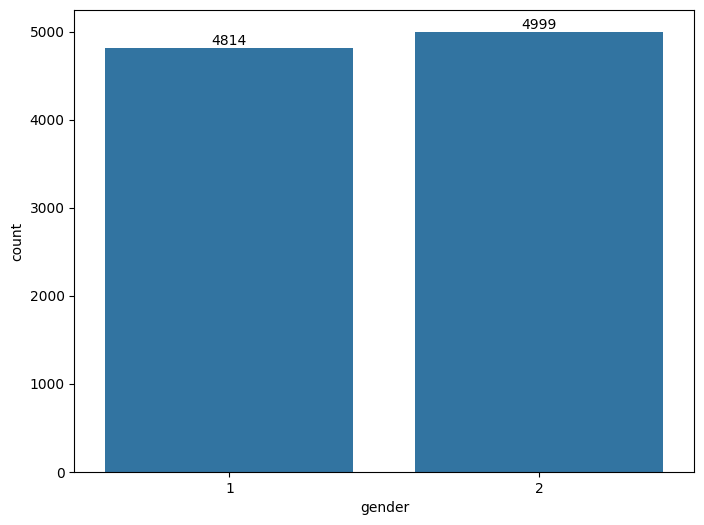

In [94]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = df_an['gender'])
ax.bar_label(ax.containers[0])
plt.show()

In [95]:
columns1 = ['gender', 'Hb (g/dl)', 'Hct (%)', 'RBC (mln/ul)', 'Fe (ug/dl)', 'MCV (fL)', 'MCHC (g/dl)', 'MCH (pg)']
columns2 = ['Hb (g/dl)', 'Hct (%)', 'RBC (mln/ul)', 'Fe (ug/dl)', 'MCV (fL)', 'MCHC (g/dl)', 'MCH (pg)']

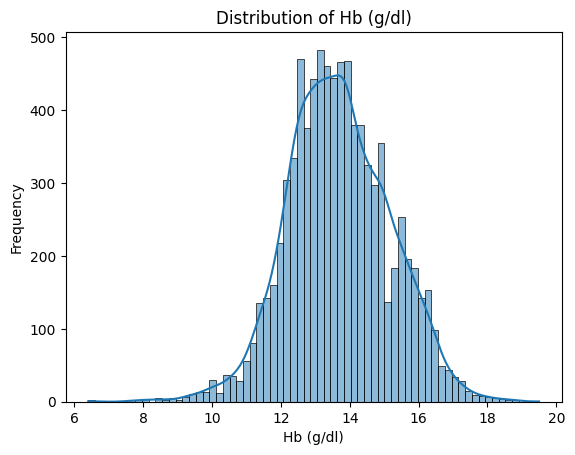

Hb (g/dl):
    Mean : 13.68
    Median : nan
    Skewness : 0.01
    Kurtosis : 0.33
    


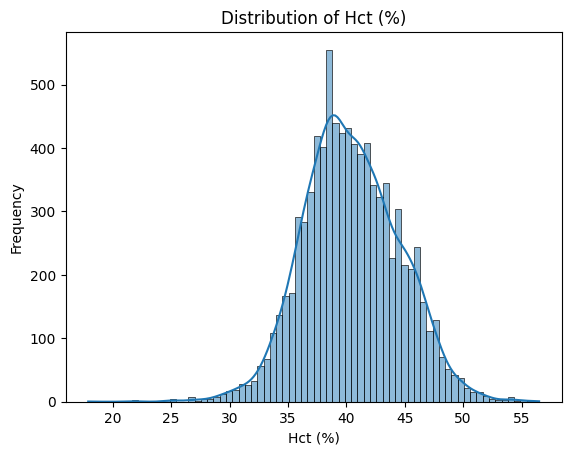

Hct (%):
    Mean : 40.44
    Median : nan
    Skewness : 0.07
    Kurtosis : 0.25
    


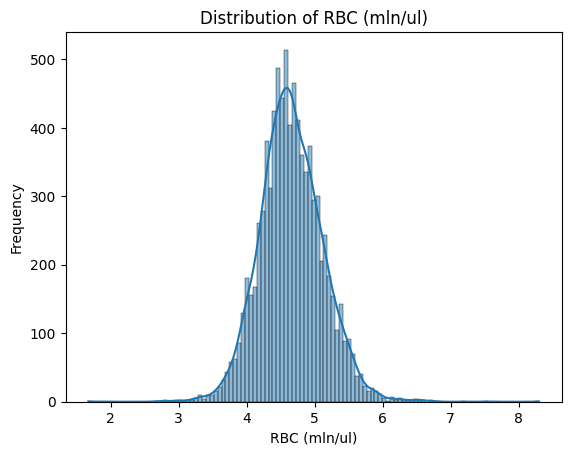

RBC (mln/ul):
    Mean : 4.66
    Median : nan
    Skewness : 0.27
    Kurtosis : 1.49
    


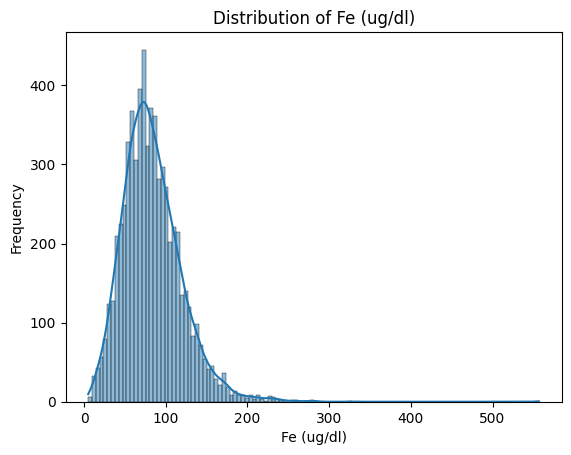

Fe (ug/dl):
    Mean : 83.45
    Median : nan
    Skewness : 1.24
    Kurtosis : 6.17
    


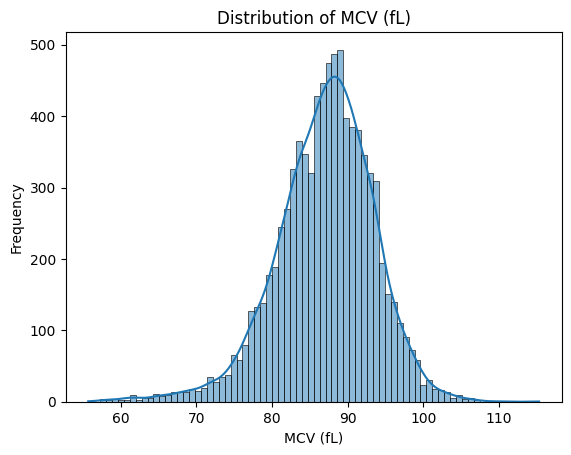

MCV (fL):
    Mean : 87.02
    Median : nan
    Skewness : -0.56
    Kurtosis : 1.35
    


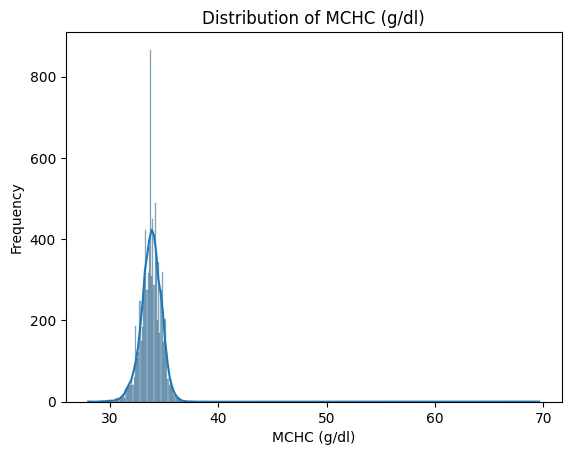

MCHC (g/dl):
    Mean : 33.81
    Median : nan
    Skewness : 4.85
    Kurtosis : 170.24
    


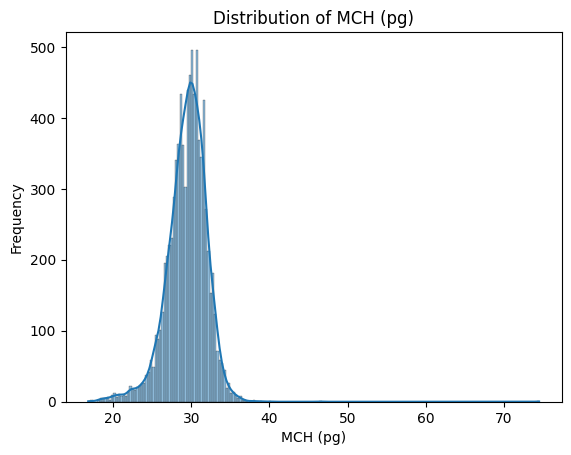

MCH (pg):
    Mean : 29.44
    Median : nan
    Skewness : -0.04
    Kurtosis : 12.97
    


In [96]:
for col in columns2:
    sns.histplot(df_an[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


    print(f'''{col}:
    Mean : {np.mean(df_an[col]):.2f}
    Median : {np.median(df_an[col]):.2f}
    Skewness : {df_an[col].skew():.2f}
    Kurtosis : {df_an[col].kurtosis():.2f}
    ''')

We can see that we have roughly the same number of women and men in the selected dataset. Additionally, each of the distributions is fairly symmetric, as indicated by skewness parameters close to zero. Therefore, I am filling the missing values in these datasets with the mean value.

In [97]:
#I am filling the missing values with the mean value.
for col in columns2:
    mean_value = df_an[col].mean()
    df_an[col].fillna(mean_value, inplace=True)

In [98]:
print(df_an.dtypes)

gender            int64
Hb (g/dl)       float64
Hct (%)         float64
RBC (mln/ul)    float64
Fe (ug/dl)      float64
MCV (fL)        float64
MCHC (g/dl)     float64
MCH (pg)        float64
dtype: object


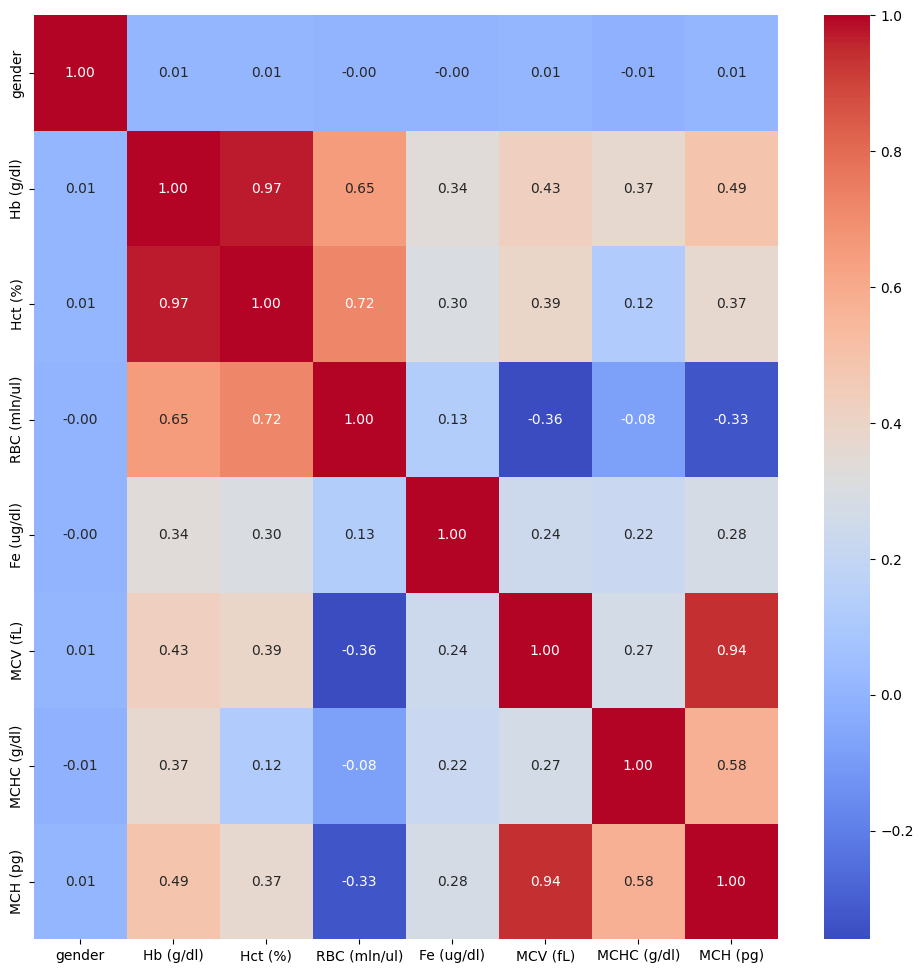

In [99]:
cor_matrix = df_an.corr(method='pearson').round(2)

plt.figure(figsize=(12, 12))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("")
plt.show()

We can see that there is a very strong correlation between the values of MCV (mean corpuscular volume) and MCH (mean corpuscular hemoglobin), as well as between Hct (hematocrit) and Hb (hemoglobin). A strong correlation is also observed between RBC (red blood cell count) and Hct (hematocrit). This should be taken into account in further analysis.

In [100]:
#Data standardization.
from sklearn.preprocessing import MinMaxScaler

#Without Hct and MCH, as their correlations with other variables may significantly interfere (they may provide similar information).
# I have also removed MCV, MCHC, and MCH to simplify the dataset and achieve better clustering.
df_an_claster = df_an.loc[:, ['Hb (g/dl)', 'RBC (mln/ul)', 'Fe (ug/dl)']]
scaler = MinMaxScaler()
df_an_scaled = scaler.fit_transform(df_an_claster)
df_an_scaled = pd.DataFrame(df_an_scaled, columns=df_an_claster.columns)
df_an_scaled

,Hb (g/dl),RBC (mln/ul),Fe (ug/dl)
0,0.671756,0.515837,0.096014
1,0.419847,0.327300,0.134058
2,0.824427,0.582202,0.168478
3,0.496183,0.443439,0.142111
4,0.618321,0.460030,0.155797
...,...,...,...
9808,0.648855,0.512821,0.123188
9809,0.442748,0.384615,0.142111
9810,0.442748,0.375566,0.079710
9811,0.557252,0.506787,0.142111


In [101]:
# Dimensionality reduction and data visualization using t-SNE.
from sklearn.manifold import TSNE


# I am creating a t-SNE object.
tsne = TSNE(n_components=2,
            perplexity=20,
            random_state=42)

# I am fitting and transforming the data.
df_tsne = tsne.fit_transform(df_an_scaled)



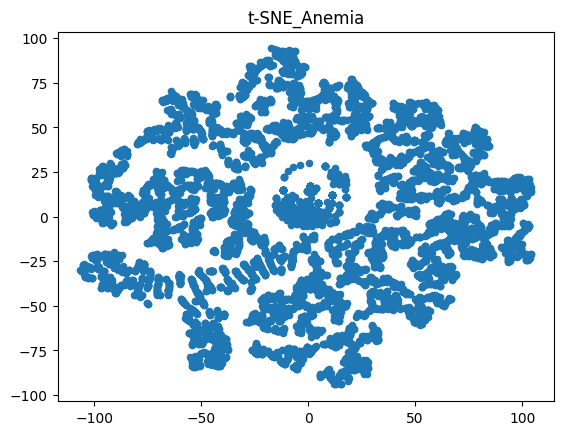

In [102]:
plt.scatter(df_tsne[:, 0],
            df_tsne[:, 1],
            cmap='viridis',
            s=20)
plt.title('t-SNE_Anemia')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_tSNE.eps')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_tSNE.jpg')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_tSNE.png')


plt.show()

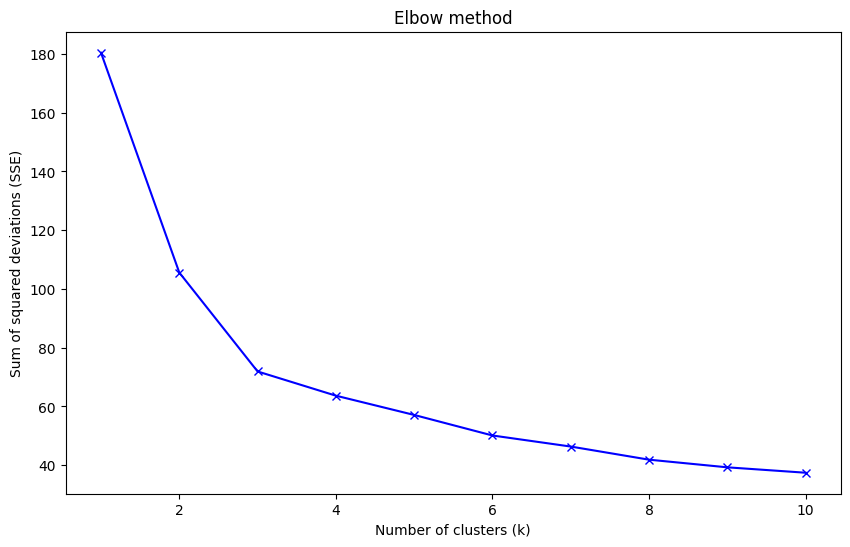

In [103]:
from sklearn.cluster import KMeans

X = df_an_scaled

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared deviations (SSE)')
plt.title('Elbow method')
plt.show()

In [104]:
from sklearn.metrics import silhouette_score
from sklearn import metrics


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

df_an['Cluster'] = clusters

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, clusters):.3f}")

Silhouette Coefficient: 0.303


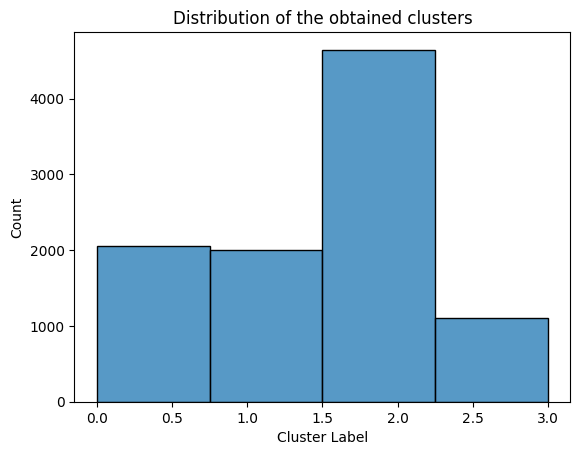

In [105]:
sns.histplot(clusters, bins=len(set(clusters)), kde=False)
plt.title('Distribution of the obtained clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

Number of samples in each cluster:
Cluster
0    2054
1    2008
2    4645
3    1106
Name: count, dtype: int64


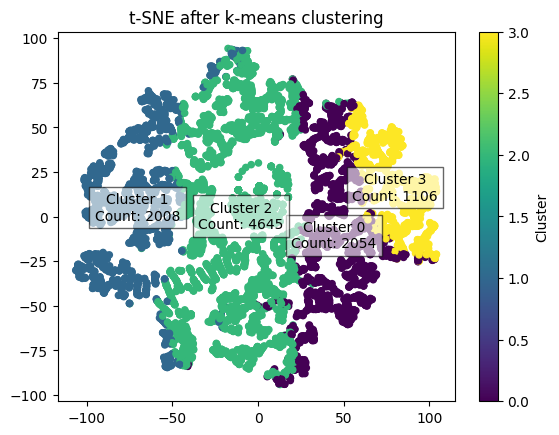

In [106]:
cluster_counts = df_an['Cluster'].value_counts().sort_index()

# Displaying the sample count in each cluster
print("Number of samples in each cluster:")
print(cluster_counts)

plt.scatter(df_tsne[:, 0],
            df_tsne[:, 1],
            c=clusters,
            cmap='viridis',
            s=20)
plt.title('t-SNE after k-means clustering')

for cluster in cluster_counts.index:
    x = np.mean(df_tsne[clusters == cluster, 0])
    y = np.mean(df_tsne[clusters == cluster, 1])
    plt.text(x, y, f'Cluster {cluster}\nCount: {cluster_counts[cluster]}',
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.6))

plt.colorbar(label='Cluster')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_tSNE_cluster.eps')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_tSNE_cluster.jpg')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_tSNE_cluster.png')

plt.show()



In [107]:
#I am checking how many observations in each cluster have Hb < 12.
df_an['Below_12'] = df_an['Hb (g/dl)'] < 12

cluster_counts_below_12 = df_an.groupby('Cluster')['Below_12'].sum()

print("\nNumber of points in each cluster where Hb (g/dl) < 12 before standardization.:")
print(cluster_counts_below_12)



Number of points in each cluster where Hb (g/dl) < 12 before standardization.:
Cluster
0      0
1    882
2     10
3      0
Name: Below_12, dtype: int64


In [108]:
count_below_12 = (df_an['Hb (g/dl)'] < 12).sum()
print(f"Number of hemoglobin values less than 12 for the entire dataset: {count_below_12}")

Number of hemoglobin values less than 12 for the entire dataset: 892


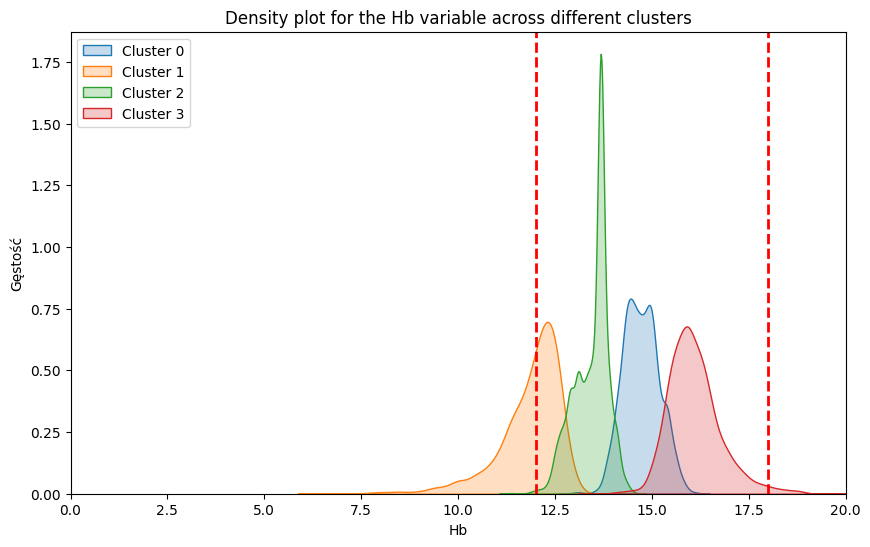

In [109]:
plt.figure(figsize=(10, 6))
for cluster_id in range(4):  # For each cluster.
    sns.kdeplot(df_an[df_an['Cluster'] == cluster_id]['Hb (g/dl)'], label=f'Cluster {cluster_id}', shade=True)
plt.title('Density plot for the Hb variable across different clusters')
plt.xlabel('Hb')
plt.ylabel('Gęstość')
plt.legend()
plt.xlim(0, 20)

plt.axvline(x=12, color='red', linestyle='--', linewidth=2)
plt.axvline(x=18, color='red', linestyle='--', linewidth=2)

plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_Density_Hb.eps', dpi = 300)
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_Density_Hb.jpg', dpi = 300)
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_Density_Hb.png', dpi = 300)


plt.show()

To summarize this stage: through trial and error, and guided by the elbow plot, I obtained four clusters. Additionally, based on information from sources tracking anemia, I concluded that the indicator for whether someone has anemia (regardless of type) is hemoglobin, with a value lower than 12. In cluster number 2, there are 779 cases out of 892 in the entire dataset (87%). Based on this, I selected the subset from cluster 2 (779 points) and labeled them as 'anemia patients.' I then added the remaining parameters to the newly created frame, along with 900 random points from clusters 1 and 3, labeling them as 'non-anemia patients.' This dataset was used to build the classifier.

Classifier - decision tree.

I am preparing the training and test datasets.

In [110]:
cluster_data2 = df_an[(df_an['Cluster'] == 2) & (df_an['Hb (g/dl)'] < 12)].copy()
cluster_data2['Anemia'] = 1

In [111]:
cluster_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 74161 to 82828
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        10 non-null     int64  
 1   Hb (g/dl)     10 non-null     float64
 2   Hct (%)       10 non-null     float64
 3   RBC (mln/ul)  10 non-null     float64
 4   Fe (ug/dl)    10 non-null     float64
 5   MCV (fL)      10 non-null     float64
 6   MCHC (g/dl)   10 non-null     float64
 7   MCH (pg)      10 non-null     float64
 8   Cluster       10 non-null     int32  
 9   Below_12      10 non-null     bool   
 10  Anemia        10 non-null     int64  
dtypes: bool(1), float64(7), int32(1), int64(2)
memory usage: 850.0 bytes


In [112]:
cluster_data2.head(20)

,gender,Hb (g/dl),Hct (%),RBC (mln/ul),Fe (ug/dl),MCV (fL),MCHC (g/dl),MCH (pg),Cluster,Below_12,Anemia
SEQN,,,,,,,,,,,
74161,2,11.9,38.8,5.19,116.000000,74.6,30.6,22.9,2,True,1
74948,2,11.9,36.8,5.43,83.445534,67.8,32.2,21.9,2,True,1
76753,1,11.3,35.8,6.24,83.445534,57.4,31.5,18.1,2,True,1
77380,1,11.9,37.1,5.41,83.445534,68.6,31.9,21.9,2,True,1
77436,2,11.8,37.8,5.65,83.445534,66.8,31.2,20.8,2,True,1
79262,1,11.4,35.5,5.79,83.445534,61.2,32.3,19.8,2,True,1
79838,2,11.7,37.1,6.15,114.000000,60.3,31.6,19.0,2,True,1
80157,2,11.9,37.4,5.95,95.000000,62.8,31.9,20.0,2,True,1
81792,1,11.4,36.6,6.30,83.445534,58.1,31.1,18.1,2,True,1


In [113]:
#I am selecting 450 cases from cluster number 1, where I assume there are no anemia cases.
cluster_data1 = df_an[df_an['Cluster'] == 1].copy()
cluster_data1['Anemia'] = 0
cluster_data1 = cluster_data1.sample(n = 450, random_state = 42)

In [114]:
#I am selecting 450 cases from cluster number 3, where I assume there are no anemia cases.
cluster_data3 = df_an[df_an['Cluster'] == 3].copy()
cluster_data3['Anemia'] = 0
cluster_data3 = cluster_data3.sample(n = 450, random_state = 42)

In [115]:
#I am merging all the data from clusters 1, 3, and 2, where I assume that the majority of cases in cluster 2 are individuals with anemia.
df_an_clusters = pd.concat([cluster_data1, cluster_data2, cluster_data3], axis=0)

In [116]:
df_an_clusters.shape

(910, 11)

In [117]:
df_an_clusters.head()

,gender,Hb (g/dl),Hct (%),RBC (mln/ul),Fe (ug/dl),MCV (fL),MCHC (g/dl),MCH (pg),Cluster,Below_12,Anemia
SEQN,,,,,,,,,,,
81383,1,12.6,36.7,4.26,51.000000,86.2,34.3,29.6,1,False,0
76136,2,11.0,33.6,3.87,40.000000,86.9,32.8,28.5,1,True,0
75486,1,12.7,38.5,4.02,67.000000,95.9,33.1,31.7,1,False,0
80386,1,12.4,37.6,4.22,40.000000,88.9,33.0,29.3,1,False,0
75648,2,11.6,32.0,3.88,83.445534,82.5,36.2,29.8,1,True,0


In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


X_1 = df_an_clusters.drop(columns=['Anemia', 'Cluster', 'Below_12', 'gender'])#Unreduced dataset.
Y_1 = df_an_clusters['Anemia']

X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size=0.1, random_state=42)

X_11 = df_an_clusters.drop(columns=['Anemia', 'Cluster', 'Below_12', 'gender', 'Hct (%)', 'RBC (mln/ul)', 'Fe (ug/dl)']) #reduced dataset
Y_11 = df_an_clusters['Anemia']

X_train_11, X_test_11, Y_train_11, Y_test_11 = train_test_split(X_11, Y_11, test_size=0.1, random_state=42)


I am building a simple decision tree model and performing cross-validation for the reduced dataset (without the columns 'Anemia', 'Cluster', 'Below_12', 'gender').

In [119]:
tree = DecisionTreeClassifier(max_depth = 4,
                              random_state = 0,
                              min_samples_leaf = 100,
                              min_samples_split = 10,
                              ccp_alpha = 0.1,
                              #max_features='sqrt',
                              criterion = 'gini')

# Cross-validation on the training set.
cv_scores = cross_val_score(tree, X_train, Y_train, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean():.2f}')
print(f'Standard deviation of CV accuracy: {cv_scores.std():.2f}')


Cross-validation scores: [0.98780488 0.98780488 0.98780488 0.98780488 0.99386503]
Mean CV accuracy: 0.99
Standard deviation of CV accuracy: 0.00


In [120]:
# Training the model on the entire training set.
tree.fit(X_train, Y_train)

y_pred = tree.predict(X_test)

# Model evaluation
accuracy_rf = accuracy_score(Y_test, y_pred)
print(f'Tree Accuracy: {accuracy_rf:.2f}')

print('\nTree Classification Report:')
print(classification_report(Y_test, y_pred))

conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Tree Accuracy: 0.99

Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.00      0.00      0.00         1

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91

Confusion Matrix:
[[90  0]
 [ 1  0]]


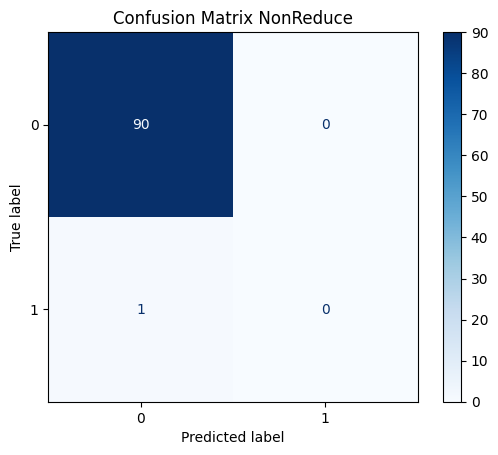

In [121]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix NonReduce')

plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_CM1.eps')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_CM1.jpg')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_CM1.png')

plt.show()

I obtained a very high accuracy score, which may indicate overfitting of the tree. Therefore, I am plotting the learning curve to verify this.

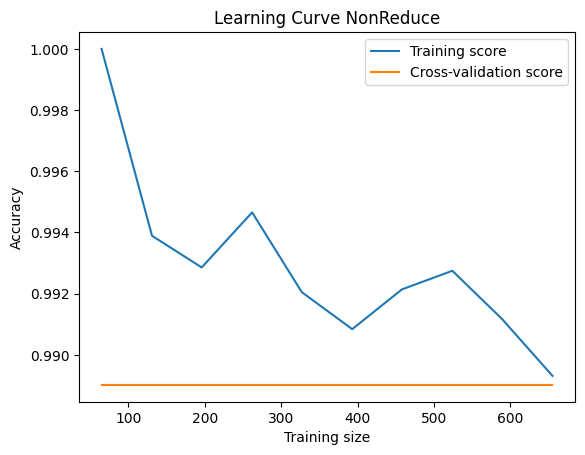

In [122]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(tree, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve NonReduce')

plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_LC1.eps')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_LC1.jpg')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_LC1.png')



plt.show()

TThe cross-validation curve for the model is very low, while the training curve is decreasing. This means that the model is learning worse and worse and generalizing poorly. These are indications that the model is overtrained.

Now I will check the performance of my unreduced model on other data where it is known that a given patient suffers from anemia. Data from the Internet plus mine.

In [123]:
data_anemia = pd.DataFrame({
    'gender' : [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
    'Hb (g/dl)': [12.81, 6.1, 6.4, 8.9, 11, 12.6, 15.7, 13.6, 12.6, 12.8],
    'Hct (%)': [37.7, 18.7, 17, 24.1, 33.8, 36, 44, 41.6, 35.5, 37.3],
    'RBC (mln/ul)': [4.12, 1.36, 1.4, 2.1, 3.32, 4.46, 5.05, 4.31, 4.7, 4.43],
    'Fe (ug/dl)': [88, 99, 65, 80, 99, 110, 100, 97, 120, 102],
    'MCV (fL)': [91, 134.3, 135.9, 114.8, 101.8, 80.7, 87.2, 96.5, 77.3, 84.2],
    'MCHC (g/dl)': [34, 33.5, 33.9, 36.9, 32.5, 35, 35.6, 32.7, 35.5, 34.3],
    'MCH (pg)' : [31.1, 45, 46.1, 42.4, 33.1, 28.3, 31.1, 31.6, 27.5, 28.9],
    'Anemia' : [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]})

In [124]:
X_new = data_anemia.drop(columns=['Anemia', 'gender'])
y_new = data_anemia['Anemia']

y_pred_new = tree.predict(X_new)

accuracy_new = accuracy_score(y_new, y_pred_new)
conf_matrix_new = confusion_matrix(y_new, y_pred_new)
class_report_new = classification_report(y_new, y_pred_new)

print(f"Accuracy on data_anemia: {accuracy_new * 100:.2f}%")
print("Confusion Matrix on data_anemia:")
print(conf_matrix_new)
print("Classification Report on data_anemia:")
print(class_report_new)

Accuracy on data_anemia: 50.00%
Confusion Matrix on data_anemia:
[[5 0]
 [5 0]]
Classification Report on data_anemia:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.00      0.00      0.00         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



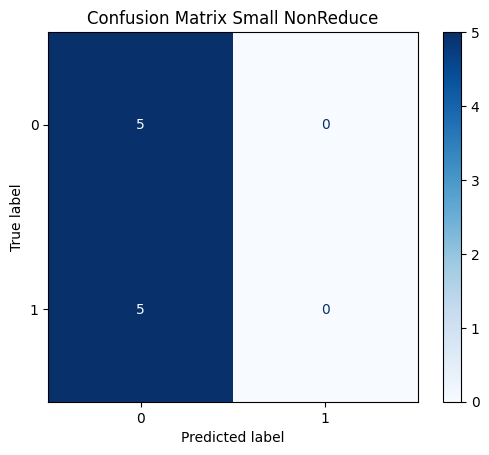

In [125]:
cm_1 = confusion_matrix(y_new, y_pred_new)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=tree.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Small NonReduce')

plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_CM3.eps')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_CM3.jpg')
plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Anemia_CM3.png')

plt.show()

# 3. Diabetes

I choose the following features: GlycoHemoglobin (GlyHb), gender, urine albumin-to-creatinine ratio (Alb/Cr), urine albumin (Alb), urine creatinine (Cr), fasting blood glucose (serum) (Glu), blood glucose level after 2 hours (Glu_2h) from the oral glucose tolerance test, good cholesterol in the blood (HDL), triglycerides (Tgl), BMI, and information on whether the doctor diagnosed the patient with diabetes. These will be the labels for classification.

---



In [126]:
#if 'LBDSGLSI' in df_data.columns:
#    print(f"Kolumna '{'LBDSGLSI'}' istnieje.")
#else:
#    print(f"Kolumna '{'LBDSGLSI'}' nie istnieje.")

In [127]:
df_diabet = df_data.loc[:,['RIAGENDR', 'LBXGH', 'URDACT', 'URXUCR', 'URXUMA',  'LBXGLT', 'LBDHDD', 'LBDTRSI', 'LBDSGLSI', 'DIQ010', 'BMXBMI']].copy()

In [128]:
# Decodes column names and adds appropriate units.
col_decoder_2 = {'RIAGENDR' : 'gender', 'LBXGH' : 'GlyHb (%)', 'URDACT' : 'Alb/Cr (mg/g)', 'URXUCR' : 'Cr (mg/dL)', 'URXUMA' : 'Alb (ug/ml)', 'LBXGLT' : 'Glu_2h (mg/dL)', 'LBDHDD' : 'HDL (mg/dL)', 'LBDTRSI' : 'Tgl (mmol/L)', 'LBDSGLSI' : 'Glu (mmol/L)', 'BMXBMI' : 'BMI (kg/m)',  'DIQ010' : 'Diabetes'}

In [129]:
df_diabet = df_diabet.rename(columns = col_decoder_2)

In [130]:
df_diabet.head()

,gender,GlyHb (%),Alb/Cr (mg/g),Cr (mg/dL),Alb (ug/ml),Glu_2h (mg/dL),HDL (mg/dL),Tgl (mmol/L),Glu (mmol/L),Diabetes,BMI (kg/m)
SEQN,,,,,,,,,,,
73557,1,13.9,11.03,NaN,4.3,NaN,65.0,NaN,30.75,1.0,26.7
73558,1,9.1,306.00,NaN,153.0,NaN,50.0,NaN,12.16,1.0,28.6
73559,1,8.9,10.53,NaN,11.9,NaN,60.0,0.576,10.16,1.0,28.9
73560,1,NaN,21.05,NaN,16.0,NaN,61.0,NaN,NaN,2.0,17.1
73561,2,4.9,173.47,NaN,255.0,NaN,85.0,0.847,5.77,2.0,19.7


In [131]:
print(df_diabet.dtypes)

gender              int64
GlyHb (%)         float64
Alb/Cr (mg/g)     float64
Cr (mg/dL)        float64
Alb (ug/ml)       float64
Glu_2h (mg/dL)    float64
HDL (mg/dL)       float64
Tgl (mmol/L)      float64
Glu (mmol/L)      float64
Diabetes          float64
BMI (kg/m)        float64
dtype: object


In [132]:
#I check for empty values
df_diabet_isna = df_diabet.isna().sum() > 0
df_diabet.loc[:, df_diabet_isna].isna().sum().sort_values(ascending=False)/len(df_diabet)*100

,0
Glu_2h (mg/dL),76.103129
Cr (mg/dL),72.587384
Tgl (mmol/L),67.940487
Glu (mmol/L),33.221237
GlyHb (%),32.304086
HDL (mg/dL),22.307144
Alb/Cr (mg/g),17.945582
Alb (ug/ml),17.945582
BMI (kg/m),7.724447
Diabetes,3.984510


In [133]:
columns3 = ['GlyHb (%)', 'Alb/Cr (mg/g)', 'Cr (mg/dL)', 'Alb (ug/ml)',
       'Glu_2h (mg/dL)', 'HDL (mg/dL)', 'Tgl (mmol/L)', 'Glu (mmol/L)', 'BMI (kg/m)']

columns4 = ['gender', 'GlyHb (%)', 'Alb/Cr (mg/g)', 'Cr (mg/dL)', 'Alb (ug/ml)',
       'Glu_2h (mg/dL)', 'HDL (mg/dL)', 'Tgl (mmol/L)', 'Glu (mmol/L)', 'BMI (kg/m)'
       'Diabetes']

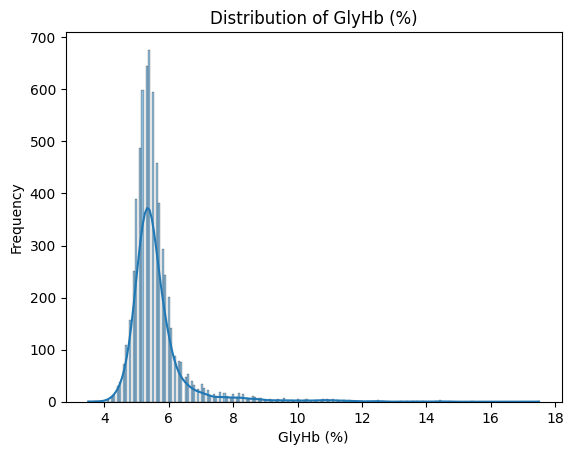

GlyHb (%):
    Mean : 5.64
    Median : nan
    Skewness : 3.94
    Kurtosis : 22.39
    


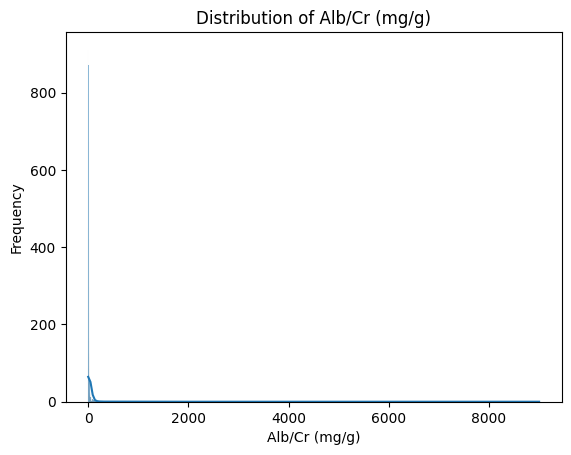

Alb/Cr (mg/g):
    Mean : 41.91
    Median : nan
    Skewness : 17.72
    Kurtosis : 393.12
    


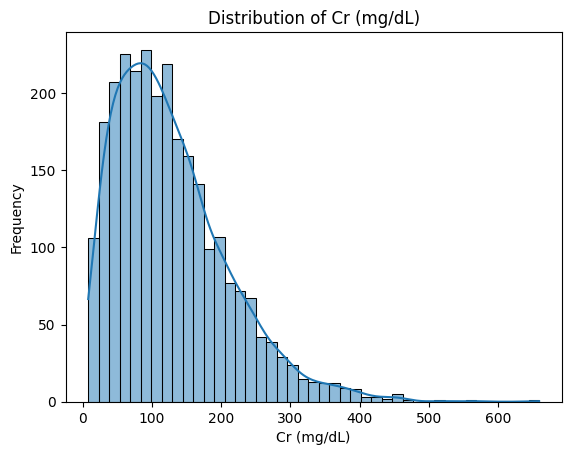

Cr (mg/dL):
    Mean : 127.58
    Median : nan
    Skewness : 1.15
    Kurtosis : 1.93
    


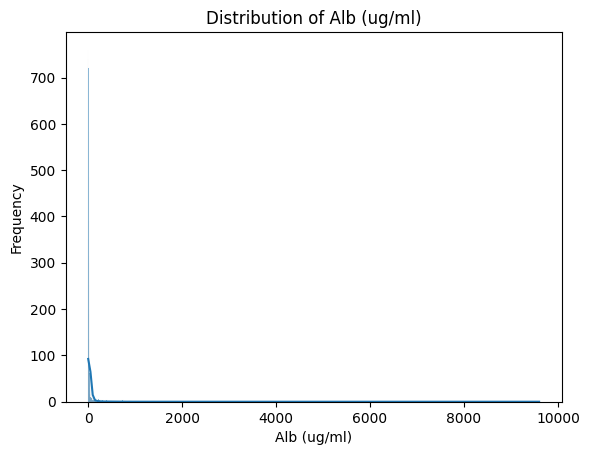

Alb (ug/ml):
    Mean : 41.22
    Median : nan
    Skewness : 19.33
    Kurtosis : 547.14
    


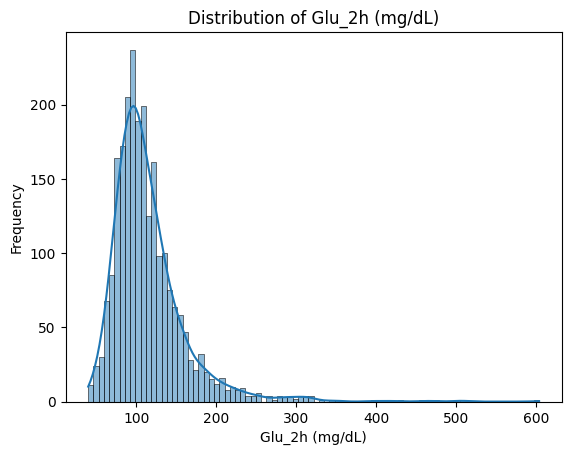

Glu_2h (mg/dL):
    Mean : 115.28
    Median : nan
    Skewness : 2.82
    Kurtosis : 15.40
    


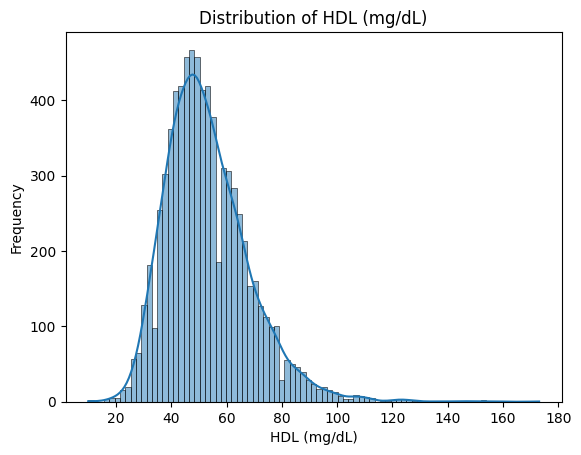

HDL (mg/dL):
    Mean : 53.11
    Median : nan
    Skewness : 1.09
    Kurtosis : 2.91
    


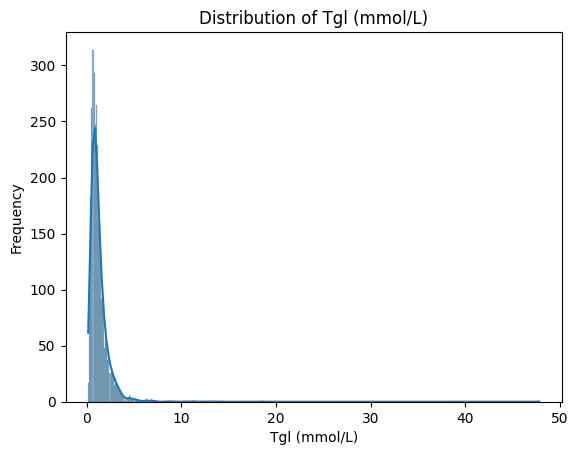

Tgl (mmol/L):
    Mean : 1.27
    Median : nan
    Skewness : 16.68
    Kurtosis : 530.41
    


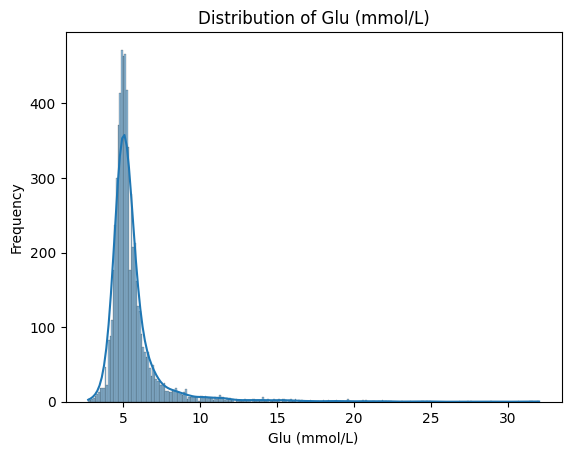

Glu (mmol/L):
    Mean : 5.68
    Median : nan
    Skewness : 5.08
    Kurtosis : 36.86
    


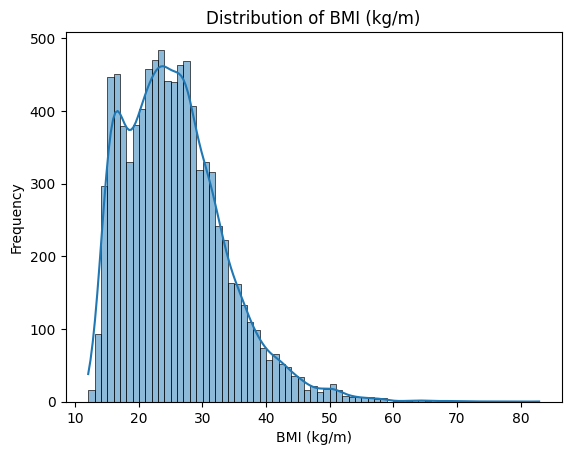

BMI (kg/m):
    Mean : 25.68
    Median : nan
    Skewness : 1.02
    Kurtosis : 2.00
    


In [134]:
for col in columns3:
    sns.histplot(df_diabet[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


    print(f'''{col}:
    Mean : {np.mean(df_diabet[col]):.2f}
    Median : {np.median(df_diabet[col]):.2f}
    Skewness : {df_diabet[col].skew():.2f}
    Kurtosis : {df_diabet[col].kurtosis():.2f}
    ''')

Unfortunately, I have significant missing data in several columns. In the columns Glu, GlyHb, HDL, and BMI, I have fairly symmetrical distributions with low kurtosis, so I can fill in the missing values using the mean. The features Alb and Alb/Cr have high kurtosis values, so I will fill the missing values using the MICE (Multiple Imputation by Chained Equations) method. The 'Diabetes' column contains information on whether someone has been diagnosed with diabetes by a doctor. I encode it as 0 (no diabetes), 1 (has diabetes), and fill missing values with 0. I am removing the columns Glu_2h, Tgl, and Cr, as the missing data in these columns are too extensive to be used for further analysis.

In [135]:
#I fill in the gaps with the average value
columns3_ = ['Glu (mmol/L)', 'HDL (mg/dL)', 'GlyHb (%)', 'BMI (kg/m)', 'Cr (mg/dL)']
for col in columns3_:
    mean_value = df_diabet[col].mean()
    df_diabet[col].fillna(mean_value, inplace=True)

In [136]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


col_to_imput = ['Alb (ug/ml)', 'Alb/Cr (mg/g)']
data_to_imput = df_diabet[col_to_imput]

imputer = IterativeImputer(random_state=0)
df_diabet[col_to_imput] = imputer.fit_transform(data_to_imput)

In [137]:
df_diabet = df_diabet.drop(columns=['Glu_2h (mg/dL)', 'Tgl (mmol/L)']) #removing columns

In [138]:
df_diabet.head(10)

,gender,GlyHb (%),Alb/Cr (mg/g),Cr (mg/dL),Alb (ug/ml),HDL (mg/dL),Glu (mmol/L),Diabetes,BMI (kg/m)
SEQN,,,,,,,,,
73557,1,13.900000,11.030000,127.578439,4.300000,65.000000,30.750000,1.0,26.700000
73558,1,9.100000,306.000000,127.578439,153.000000,50.000000,12.160000,1.0,28.600000
73559,1,8.900000,10.530000,127.578439,11.900000,60.000000,10.160000,1.0,28.900000
73560,1,5.642556,21.050000,127.578439,16.000000,61.000000,5.678097,2.0,17.100000
73561,2,4.900000,173.470000,127.578439,255.000000,85.000000,5.770000,2.0,19.700000
73562,1,5.500000,166.220000,127.578439,123.000000,38.000000,5.770000,2.0,41.700000
73563,1,5.642556,41.905695,127.578439,41.218854,53.105194,5.678097,NaN,25.678244
73564,2,5.500000,7.850000,127.578439,19.000000,58.000000,5.940000,2.0,35.700000
73565,1,5.400000,7.220000,127.578439,1.300000,59.000000,6.000000,2.0,26.500000


The Diabetes column has values: 1 (diagnosed diabetes), 2 (no diabetes), 3 (borderline), 7 (patient refused to provide information), 9 (unknown) and empty values. I change 2 to 0 and 7,9 to 0. I fill in the gaps with 0.

In [139]:
df_diabet['Diabetes'].replace(2, 0, inplace=True)
df_diabet['Diabetes'].replace([3, 7, 9], 0, inplace=True)
df_diabet['Diabetes'].fillna(0, inplace=True)

In [140]:
df_diabet['Diabetes'].head(10)

,Diabetes
SEQN,
73557,1.0
73558,1.0
73559,1.0
73560,0.0
73561,0.0
73562,0.0
73563,0.0
73564,0.0
73565,0.0


In [141]:
df_diabet['Diabetes'].value_counts()

,count
Diabetes,
0.0,9100
1.0,713


We can see that the dataset is imbalanced. This may lead to a biased model and difficulties in evaluating it. Therefore, for building the classifier model, I will use all the variables with a value of 1, as well as the same number of variables with a value of 0 (selected randomly)

In [142]:
df_diabet_one = df_diabet[df_diabet['Diabetes'] == 1] #data where Diabetes has only 1
df_diabet_zeros = df_diabet[df_diabet['Diabetes'] == 0] #data where Diabetes has only 0

df_diabet_zeros_sample = df_diabet_zeros.sample(n=len(df_diabet_one), random_state=0) #draws data from 0 in Diabetes

df_diabet_new = pd.concat([df_diabet_one, df_diabet_zeros_sample]) #new combined dataset for classification

In [143]:
df_diabet_new['Diabetes'].value_counts()

,count
Diabetes,
1.0,713
0.0,713


Now I will work on obtaining a classifier that will predict whether a given patient has diabetes or not.

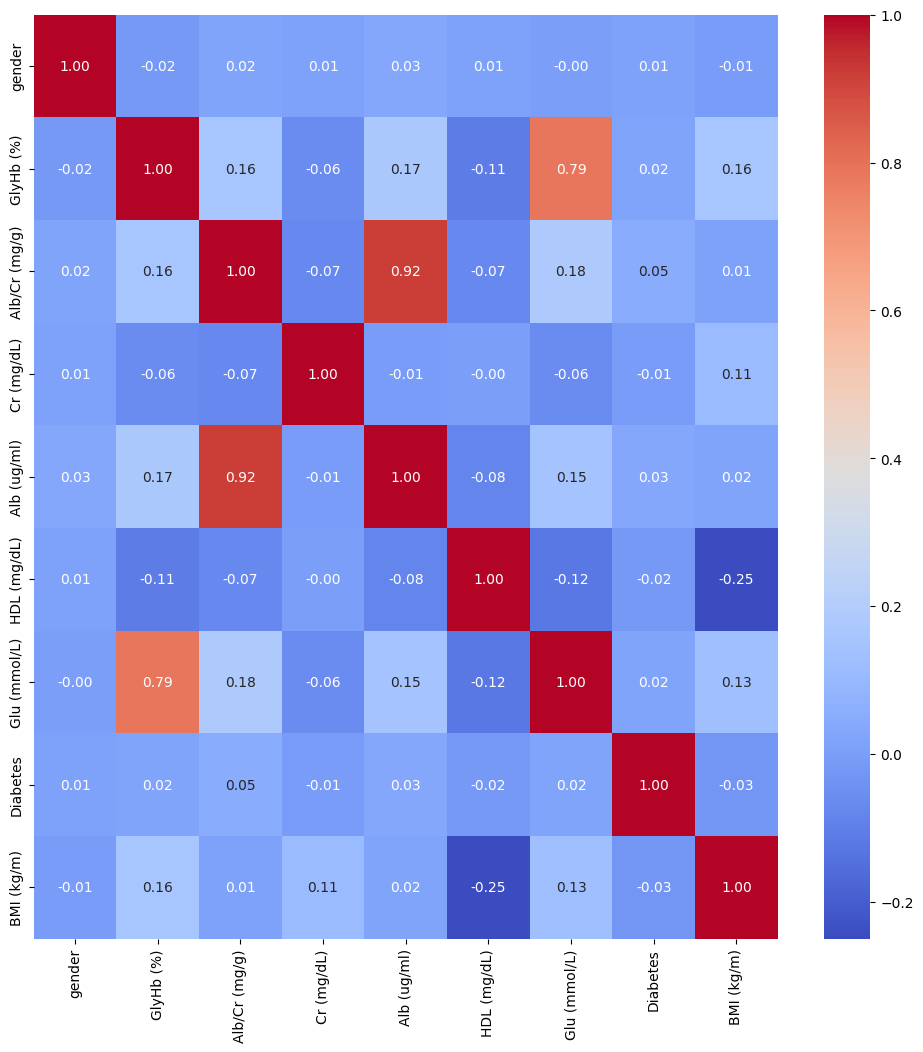

In [144]:
cor_matrix_2 = df_diabet_new.corr(method='pearson').round(2)

plt.figure(figsize=(12, 12))
sns.heatmap(cor_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("")
plt.show()

In [145]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_2 = df_diabet_new.drop(columns=['Diabetes', 'gender', 'Glu (mmol/L)'])
Y_2 = df_diabet_new['Diabetes']

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)

In [146]:
df_diabet_new.head()

,gender,GlyHb (%),Alb/Cr (mg/g),Cr (mg/dL),Alb (ug/ml),HDL (mg/dL),Glu (mmol/L),Diabetes,BMI (kg/m)
SEQN,,,,,,,,,
73557,1,13.900000,11.03,127.578439,4.3,65.000000,30.750000,1.0,26.7
73558,1,9.100000,306.00,127.578439,153.0,50.000000,12.160000,1.0,28.6
73559,1,8.900000,10.53,127.578439,11.9,60.000000,10.160000,1.0,28.9
73571,1,5.642556,8.29,127.578439,6.3,53.105194,5.678097,1.0,20.0
73615,2,5.642556,25.89,127.578439,29.0,61.000000,5.678097,1.0,16.7


In [147]:
X_2.head()

,GlyHb (%),Alb/Cr (mg/g),Cr (mg/dL),Alb (ug/ml),HDL (mg/dL),BMI (kg/m)
SEQN,,,,,,
73557,13.900000,11.03,127.578439,4.3,65.000000,26.7
73558,9.100000,306.00,127.578439,153.0,50.000000,28.6
73559,8.900000,10.53,127.578439,11.9,60.000000,28.9
73571,5.642556,8.29,127.578439,6.3,53.105194,20.0
73615,5.642556,25.89,127.578439,29.0,61.000000,16.7


I am now testing several classification models, evaluating them using accuracy and recall coefficients.

In [148]:
tree_22 = DecisionTreeClassifier(max_depth = 4,
                              random_state = 0,
                              min_samples_leaf = 100,
                              min_samples_split = 30,
                              criterion = 'entropy')



# Cross-validation on the training set
cv_scores = cross_val_score(tree_22, X_train_2, Y_train_2, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean():.2f}')
print(f'Standard deviation of CV accuracy: {cv_scores.std():.2f}')


Cross-validation scores: [0.51315789 0.54385965 0.44736842 0.49561404 0.50438596]
Mean CV accuracy: 0.50
Standard deviation of CV accuracy: 0.03


In [149]:
# Training the model on the entire training set
tree_22.fit(X_train_2, Y_train_2)

y_pred_22 = tree_22.predict(X_test_2)

# Model evaluation
accuracy_rf = accuracy_score(Y_test_2, y_pred_22)
print(f'Tree Accuracy: {accuracy_rf:.2f}')

print('\nTree Classification Report:')
print(classification_report(Y_test_2, y_pred_22))

conf_matrix = confusion_matrix(Y_test_2, y_pred_22)
print("Confusion Matrix:")
print(conf_matrix)

Tree Accuracy: 0.49

Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.50      0.51       150
         1.0       0.46      0.48      0.47       136

    accuracy                           0.49       286
   macro avg       0.49      0.49      0.49       286
weighted avg       0.49      0.49      0.49       286

Confusion Matrix:
[[75 75]
 [71 65]]


Text(0.5, 1.0, 'Learning Curve Tree')

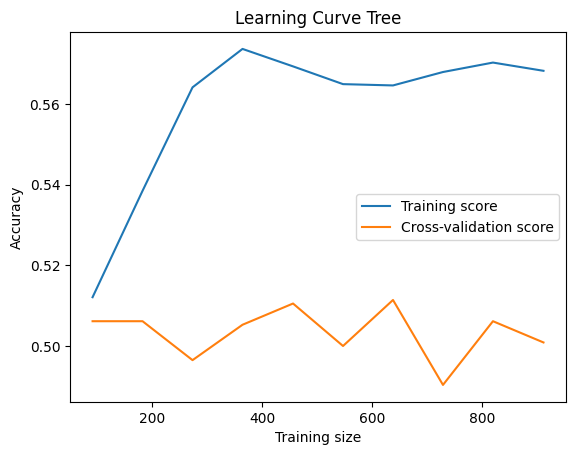

In [150]:
train_sizes, train_scores, test_scores = learning_curve(tree_22, X_train_2, Y_train_2, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve Tree')

In [151]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='kd_tree', leaf_size=10, p=2, metric='minkowski')

knn.fit(X_train_2, Y_train_2)

y_pred_knn = knn.predict(X_test_2)

accuracy_knn = accuracy_score(Y_test_2, y_pred_knn)
print(f'K-NN Accuracy: {accuracy_knn:.2f}')

print('\nK-NN Classification Report:')
print(classification_report(Y_test_2, y_pred_knn))

conf_matrix = confusion_matrix(Y_test_2, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

K-NN Accuracy: 0.48

K-NN Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       150
         1.0       0.45      0.46      0.45       136

    accuracy                           0.48       286
   macro avg       0.48      0.48      0.48       286
weighted avg       0.48      0.48      0.48       286

Confusion Matrix:
[[75 75]
 [74 62]]


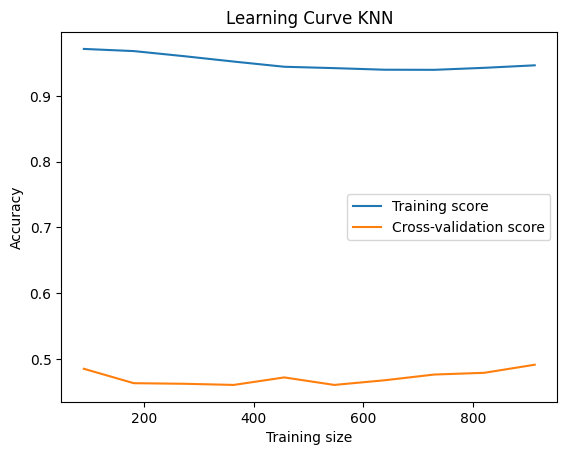

In [152]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(knn, X_train_2, Y_train_2, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve KNN')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Cukrzyca_knn.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Cukrzyca_knn.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Cukrzyca_knn.png')



plt.show()

In [153]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 1), activation='relu', solver='adam', alpha=0.0001,
                      batch_size='auto', learning_rate='constant', max_iter=200, random_state=42)
mlp.fit(X_train_2, Y_train_2)

y_pred_mlp = mlp.predict(X_test_2)

accuracy_mlp = accuracy_score(Y_test_2, y_pred_mlp)
print(f'MLP Accuracy: {accuracy_mlp:.2f}')

print('\nMLP Classification Report:')
print(classification_report(Y_test_2, y_pred_mlp))

conf_matrix = confusion_matrix(Y_test_2, y_pred_mlp)
print("Confusion Matrix:")
print(conf_matrix)

MLP Accuracy: 0.52

MLP Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69       150
         1.0       0.00      0.00      0.00       136

    accuracy                           0.52       286
   macro avg       0.26      0.50      0.34       286
weighted avg       0.28      0.52      0.36       286

Confusion Matrix:
[[150   0]
 [136   0]]


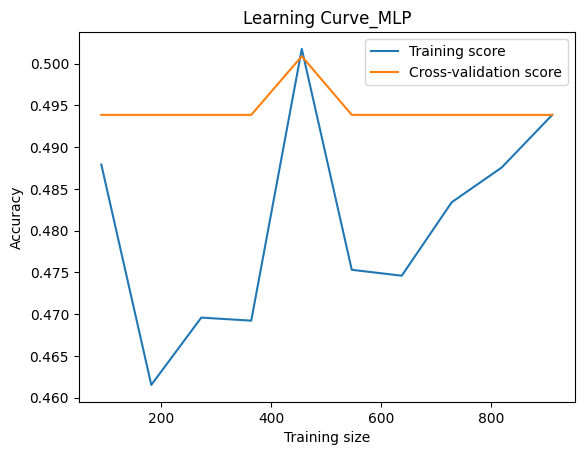

In [154]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(mlp, X_train_2, Y_train_2, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve_MLP')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Cukrzyca_mlp.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Cukrzyca_mlp.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Cukrzyca_mlp.png')



plt.show()

Among the selected models, the best one is the tree because it has a high recall rate for sick cases and satisfactory accuracy. Even though the learning curve indicates poor generalization of the model. The next step will be testing how my selected models perform on a different dataset. The dataset consists of data from 2015-2016, where a doctor determined whether a patient has diabetes or not. This dataset will be subjected to my preliminary analysis as well.

In [155]:
df = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/Diabetes_2015-2016.csv')

In [156]:
df.set_index('SEQN', inplace=True)

In [157]:
df.head(20)

,gender,GlyHb (%),Alb/Cr (mg/g),Cr (mg/dL),Alb (ug/ml),HDL (mg/dL),Diabetes,BMI (kg/m)
SEQN,,,,,,,,
83732.0,1.0,7.0,6.10,41.0,2.5,46.0,1.0,27.8
83733.0,1.0,5.5,12.82,181.0,23.2,63.0,0.0,30.8
83734.0,1.0,5.8,150.00,70.0,105.0,30.0,1.0,28.8
83735.0,2.0,5.6,5.69,102.0,5.8,61.0,0.0,42.4
83736.0,2.0,5.6,15.11,315.0,47.6,53.0,0.0,20.3
83737.0,2.0,5.9,16.25,64.0,10.4,78.0,0.0,28.6
83738.0,2.0,5.6,7.40,100.0,7.4,43.0,0.0,18.1
83739.0,1.0,5.6,8.00,25.0,2.0,48.0,0.0,15.7
83741.0,1.0,5.3,5.20,75.0,3.9,28.0,0.0,25.3


In [158]:
X_new3 = df.drop(columns=['Diabetes', 'gender'])
y_new3 = df['Diabetes']

In [159]:
y_pred_new3 = tree_22.predict(X_new3)

accuracy_new3 = accuracy_score(y_new3, y_pred_new3)
conf_matrix_new3 = confusion_matrix(y_new3, y_pred_new3)
class_report_new3 = classification_report(y_new3, y_pred_new3)

print(f"Accuracy on data_diabetes: {accuracy_new3 * 100:.2f}%")
print("Confusion Matrix on data_diabetes:")
print(conf_matrix_new3)
print("Classification Report on data_diabetes:")
print(class_report_new3)

Accuracy on data_diabetes: 61.28%
Confusion Matrix on data_diabetes:
[[3920 2196]
 [ 415  213]]
Classification Report on data_diabetes:
              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75      6116
         1.0       0.09      0.34      0.14       628

    accuracy                           0.61      6744
   macro avg       0.50      0.49      0.45      6744
weighted avg       0.83      0.61      0.69      6744



Unfortunately, the model used is not a good model. It does not cope with the correct classification of class 1, which is most important, because we want the model to detect if someone is sick. For this reason, the model must be improved or a new one must be created.

# 4. Leukemia.

I select the following data: hemoglobin (Hgb (g/dL)), platelet count (Pl (1000/uL)), red blood cell count (RBC (mln/uL)), lymphocyte count (WBC (1000/uL)), neutrophil count (NEU (1000/uL)), lymphocyte count (LMF (1000/uL)). These are the basic blood parameters that are taken into account in the context of leukemia.

4.1. Preparing data for clustering.

In [160]:
#I select the blood parameters that interest me regarding the disease entity Leukemia.
df_lek = df_data.loc[:,['RIAGENDR', 'LBXHGB', 'LBXPLTSI', 'LBXWBCSI', 'LBXRBCSI', 'LBDNENO', 'LBDLYMNO']].copy()

In [161]:
# Decodes column names and adds appropriate units.
col_decoder4 = {'RIAGENDR' : 'gender', 'LBXHGB' : 'Hb (g/dl)', 'LBXPLTSI' : 'Pl (1000/uL)',
                'LBXRBCSI' : 'RBC (mln/ul)', 'LBXWBCSI' : 'WBC (1000/uL)', 'LBDNENO' : 'NEU (1000/uL)',
                'LBDLYMNO' : 'LMF (1000/uL)'}

In [162]:
df_lek = df_lek.rename(columns = col_decoder4)

In [163]:
df_lek.head(10)

,gender,Hb (g/dl),Pl (1000/uL),WBC (1000/uL),RBC (mln/ul),NEU (1000/uL),LMF (1000/uL)
SEQN,,,,,,,
73557,1,15.2,204.0,4.7,5.09,2.0,2.0
73558,1,11.9,314.0,12.6,3.84,7.4,3.4
73559,1,17.2,237.0,7.2,5.53,4.9,1.0
73560,1,12.9,240.0,7.8,4.61,4.6,2.3
73561,2,14.5,300.0,6.6,4.72,4.5,1.4
73562,1,14.2,249.0,9.4,4.93,6.5,1.6
73563,1,NaN,NaN,NaN,NaN,NaN,NaN
73564,2,13.5,180.0,5.2,4.66,3.0,1.6
73565,1,14.3,296.0,9.5,4.43,5.5,3.0


In [164]:
df_lek_isna = df_lek.isna().sum() > 0
df_lek.loc[:, df_lek_isna].isna().sum().sort_values(ascending=False)/len(df_lek)*100

,0
NEU (1000/uL),13.186589
LMF (1000/uL),13.186589
Hb (g/dl),12.931825
Pl (1000/uL),12.931825
WBC (1000/uL),12.931825
RBC (mln/ul),12.931825


In [165]:
columns5 = ['Hb (g/dl)', 'Pl (1000/uL)', 'RBC (mln/ul)', 'WBC (1000/uL)', 'NEU (1000/uL)', 'LMF (1000/uL)']

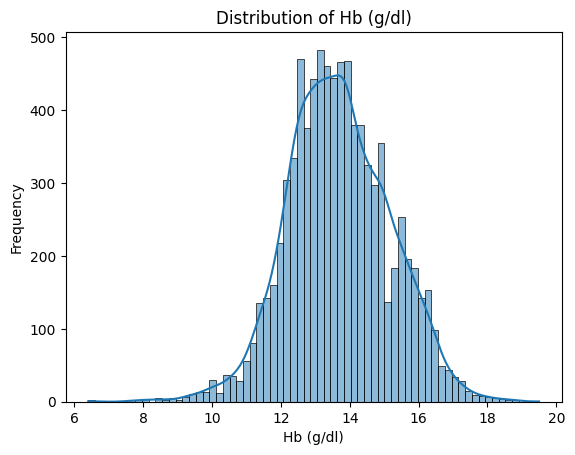

Hb (g/dl):
    Mean : 13.68
    Median : nan
    Skewness : 0.01
    Kurtosis : 0.33
    


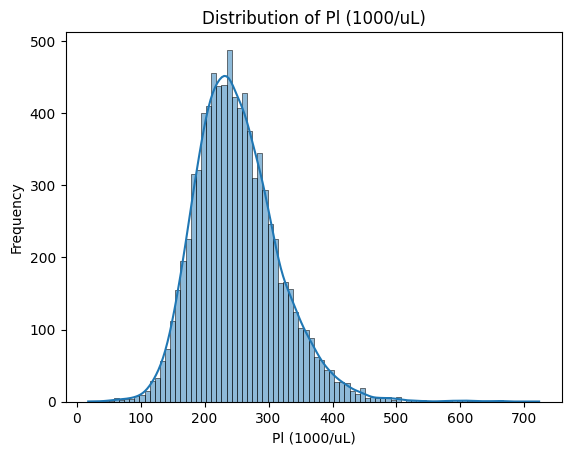

Pl (1000/uL):
    Mean : 251.20
    Median : nan
    Skewness : 0.88
    Kurtosis : 2.50
    


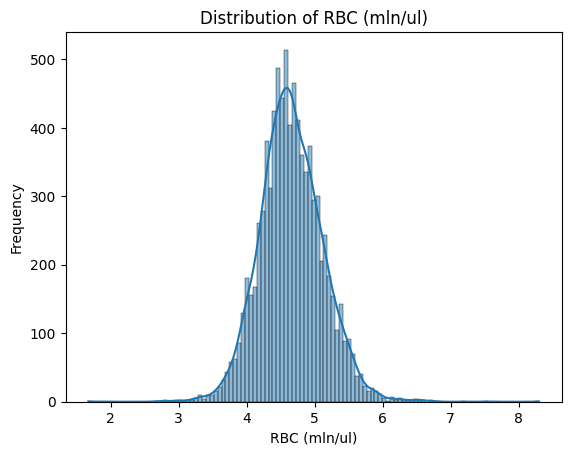

RBC (mln/ul):
    Mean : 4.66
    Median : nan
    Skewness : 0.27
    Kurtosis : 1.49
    


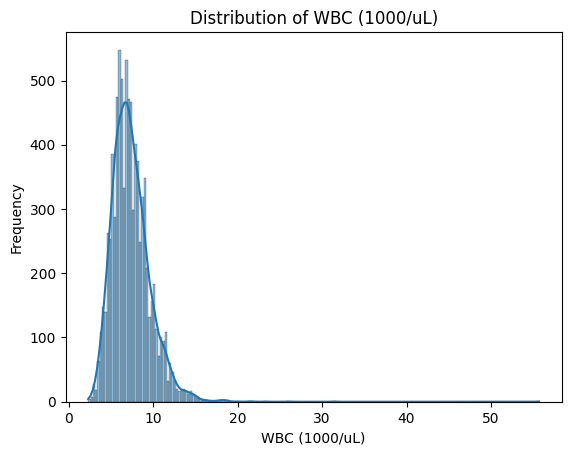

WBC (1000/uL):
    Mean : 7.38
    Median : nan
    Skewness : 2.15
    Kurtosis : 26.03
    


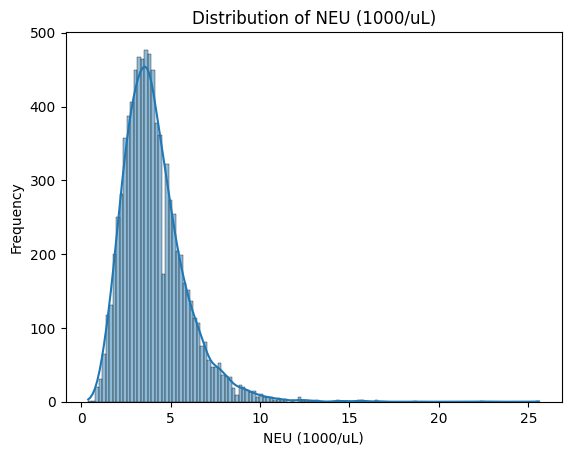

NEU (1000/uL):
    Mean : 4.09
    Median : nan
    Skewness : 1.67
    Kurtosis : 7.67
    


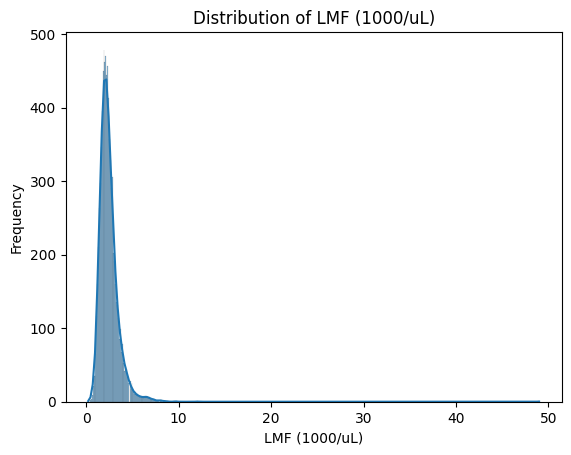

LMF (1000/uL):
    Mean : 2.43
    Median : nan
    Skewness : 9.86
    Kurtosis : 362.88
    


In [166]:
for col in columns5:
    sns.histplot(df_lek[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


    print(f'''{col}:
    Mean : {np.mean(df_lek[col]):.2f}
    Median : {np.median(df_lek[col]):.2f}
    Skewness : {df_lek[col].skew():.2f}
    Kurtosis : {df_lek[col].kurtosis():.2f}
    ''')

All obtained distributions are characterized by a small value of skewness, so they are relatively symmetrical and do not have a very high value of kurtosis. I therefore fill in the gaps with the arithmetic mean.

In [167]:
for col in columns5:
    mean_value5 = df_lek[col].mean()
    df_lek[col].fillna(mean_value5, inplace=True)

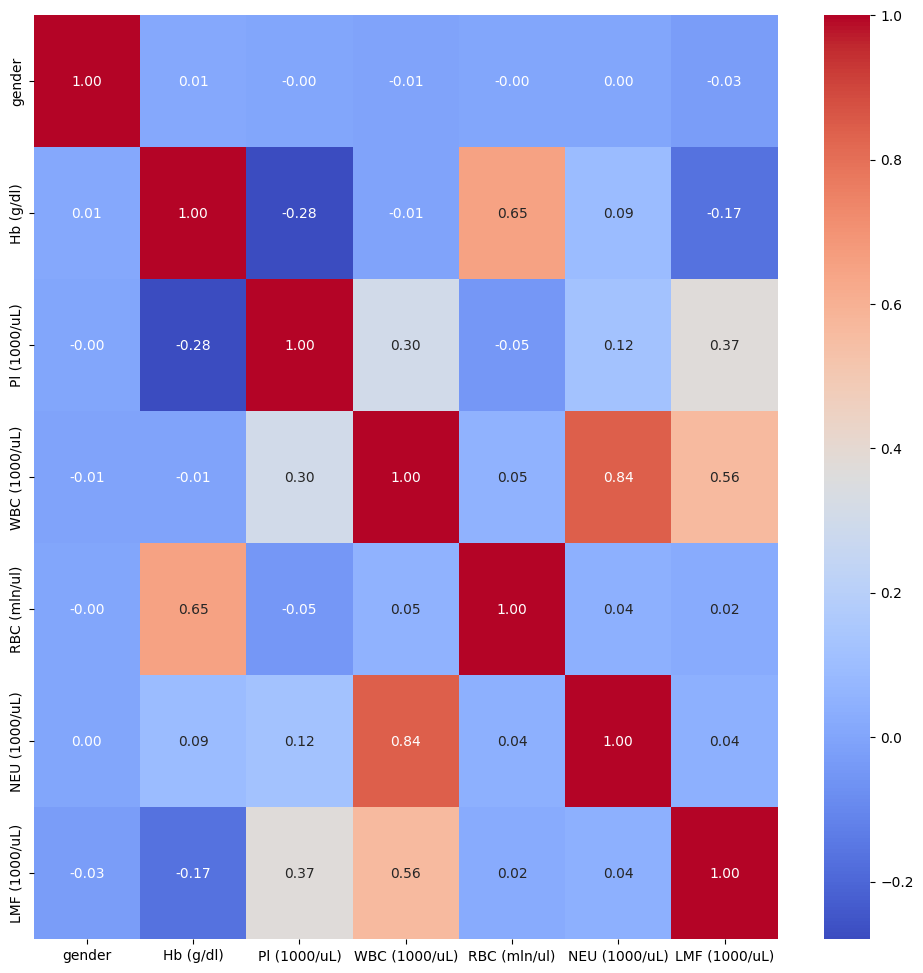

In [168]:
cor_matrix_5 = df_lek.corr(method='pearson').round(2)

plt.figure(figsize=(12, 12))
sns.heatmap(cor_matrix_5, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("")
plt.show()

We see a strong correlation between neutrophils and white blood cells. We observe a similar situation for lymphocytes, although they are less correlated with white blood cells. This is not surprising, because the number of white blood cells includes the number of neutrophils and lymphocytes. The correlation between the number of red blood cells and the level of hemoglobin is also natural, because this protein is contained in them.

4.2. Data standardization and dimensionality reduction.

Clustering in order to obtain a potential group/groups of diseases suspected of being leukemia. I remove the NEU variable because it is strongly correlated with WBC and RBC because in the vast majority of cases, their levels during leukemia are normal (at least at the very beginning of the disease). I also discard platelets because they are also normal in many cases.

In [169]:
#data standaraziation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

df_lek_claster = df_lek.loc[:, ['Hb (g/dl)',
                                #'Pl (1000/uL)',
                                'WBC (1000/uL)',
                                'LMF (1000/uL)']]
#scaler = QuantileTransformer(output_distribution='uniform')
#scaler = StandardScaler()
scaler = MinMaxScaler()
#scaler = PowerTransformer(method='yeo-johnson')
df_lek_scaled = scaler.fit_transform(df_lek_claster)
df_lek_scaled = pd.DataFrame(df_lek_scaled, columns=df_lek_claster.columns)
df_lek_scaled

,Hb (g/dl),WBC (1000/uL),LMF (1000/uL)
0,0.671756,0.044944,0.036885
1,0.419847,0.192884,0.065574
2,0.824427,0.091760,0.016393
3,0.496183,0.102996,0.043033
4,0.618321,0.080524,0.024590
...,...,...,...
9808,0.648855,0.052434,0.028689
9809,0.442748,0.080524,0.086066
9810,0.442748,0.076779,0.047131
9811,0.557252,0.142322,0.098361


In [170]:
# Dimensionality Reduction and Data Visualization with t-SNE
from sklearn.manifold import TSNE


# I am creating a t-SNE object
tsne_lek = TSNE(n_components=2,
            perplexity=20,
            random_state=42)

# Fits and transforms data
df_tsne_lek = tsne_lek.fit_transform(df_lek_scaled)



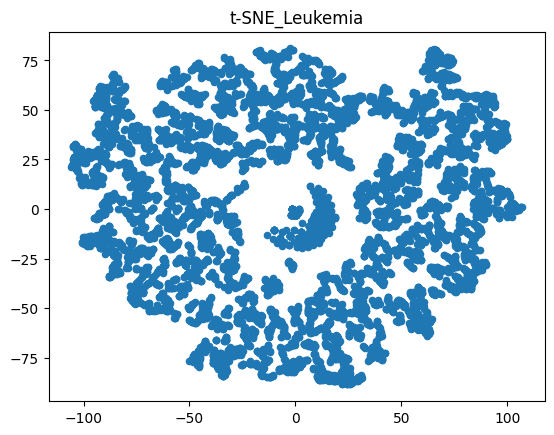

In [171]:
plt.scatter(df_tsne_lek[:, 0],
            df_tsne_lek[:, 1],
            cmap='viridis',
            s=20)
plt.title('t-SNE_Leukemia')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_tSNE.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_tSNE.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_tSNE.png')

plt.show()

4.3. K-means - clustering.

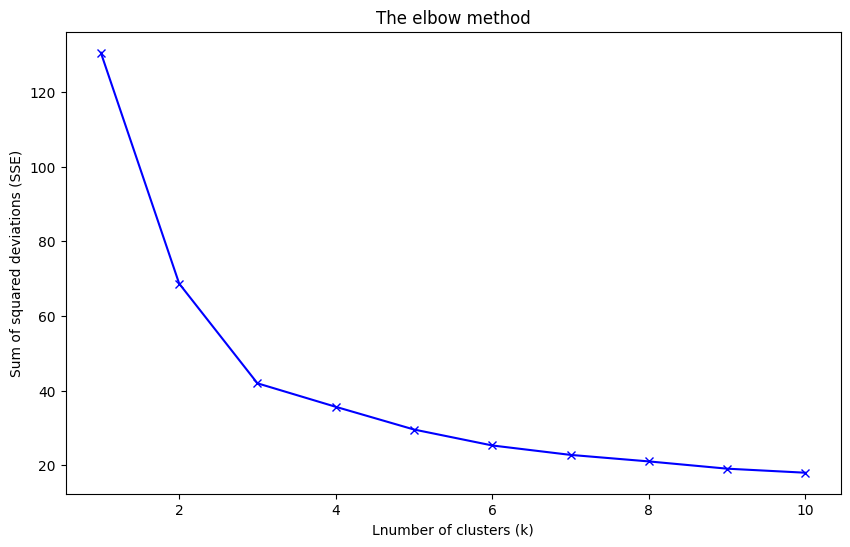

In [172]:
from sklearn.cluster import KMeans

X_lek = df_lek_scaled

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_lek)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Lnumber of clusters (k)')
plt.ylabel('Sum of squared deviations (SSE)')
plt.title('The elbow method')
plt.show()

In [173]:
from sklearn.metrics import silhouette_score
from sklearn import metrics



kmeans_lek = KMeans(n_clusters=3, init='k-means++', max_iter=3000, n_init=10, random_state=42)
clusters_lek = kmeans_lek.fit_predict(X_lek)

df_lek['Cluster'] = clusters_lek

print(f"Silhouette Coefficient: {metrics.silhouette_score(X_lek, clusters_lek):.3f}")

Silhouette Coefficient: 0.433


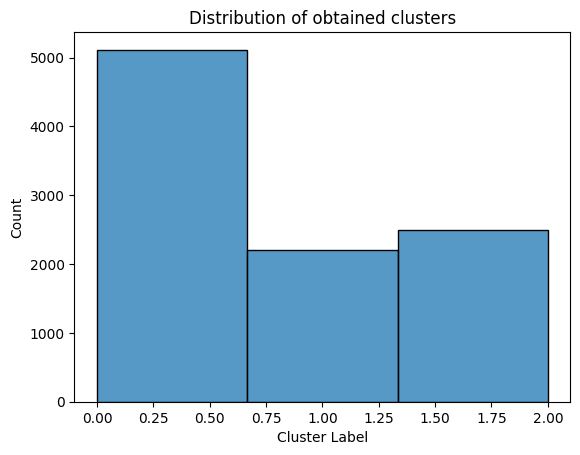

In [174]:
sns.histplot(clusters_lek, bins=len(set(clusters_lek)), kde=False)
plt.title('Distribution of obtained clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

Number of samples in each cluster:
Cluster
0    5115
1    2208
2    2490
Name: count, dtype: int64


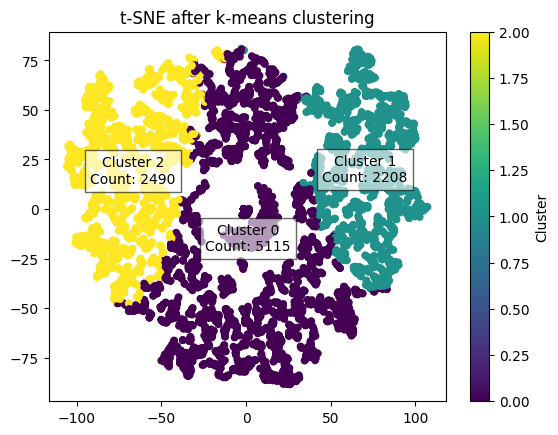

In [175]:
cluster_counts = df_lek['Cluster'].value_counts().sort_index()

# Displaying sample counts in each cluster
print("Number of samples in each cluster:")
print(cluster_counts)


plt.scatter(df_tsne_lek[:, 0],
            df_tsne_lek[:, 1],
            c=clusters_lek,
            cmap='viridis',
            s=20)
plt.title('t-SNE after k-means clustering')

for cluster in cluster_counts.index:
    x = np.mean(df_tsne_lek[clusters_lek == cluster, 0])
    y = np.mean(df_tsne_lek[clusters_lek == cluster, 1])
    plt.text(x, y, f'Cluster {cluster}\nCount: {cluster_counts[cluster]}',
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.6))

plt.colorbar(label='Cluster')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_tSNE_cluster.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_tSNE_cluster.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_tSNE_cluster.png')

plt.show()

In [176]:
inertia = kmeans.inertia_
inertia

18.014647283474613

In [177]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(X_lek, clusters_lek )
db_score

0.7874659163931464

4.4. DBSCAN

In [178]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Creating a DBSCAN instance
dbscan = DBSCAN(eps=0.001, min_samples=10)

# Assigning clusters to data
clusters_lek_DBSCAN = dbscan.fit_predict(X_lek)

# Assigning clusters to a data frame
df_lek['Cluster_dbscan'] = clusters_lek_DBSCAN

# Calculating the Silhouette Score for DBSCAN
silhouette_score = metrics.silhouette_score(X_lek, clusters_lek_DBSCAN)
print(f"Silhouette Coefficient: {silhouette_score:.3f}")


Silhouette Coefficient: -0.176


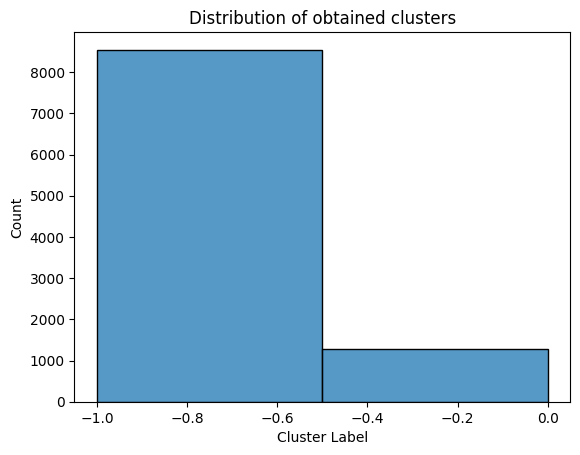

In [179]:
sns.histplot(clusters_lek_DBSCAN, bins=len(set(clusters_lek_DBSCAN)), kde=False)
plt.title('Distribution of obtained clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

Number of samples in each cluster:
Cluster_dbscan
-1    8544
 0    1269
Name: count, dtype: int64


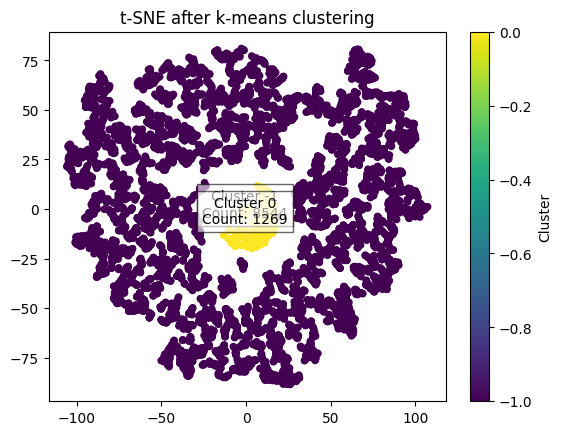

In [180]:
cluster_counts = df_lek['Cluster_dbscan'].value_counts().sort_index()

# Displaying sample counts in each cluster
print("Number of samples in each cluster:")
print(cluster_counts)


plt.scatter(df_tsne_lek[:, 0],
            df_tsne_lek[:, 1],
            c=clusters_lek_DBSCAN,
            cmap='viridis',
            s=20)
plt.title('t-SNE after k-means clustering')

for cluster in cluster_counts.index:
    x = np.mean(df_tsne_lek[clusters_lek_DBSCAN == cluster, 0])
    y = np.mean(df_tsne_lek[clusters_lek_DBSCAN == cluster, 1])
    plt.text(x, y, f'Cluster {cluster}\nCount: {cluster_counts[cluster]}',
             horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.6))

plt.colorbar(label='Cluster')
plt.show()

Analysis of the obtained clusters from the k-means model for each of the features. Below are the density graphs of the individual features along with the norms plotted.

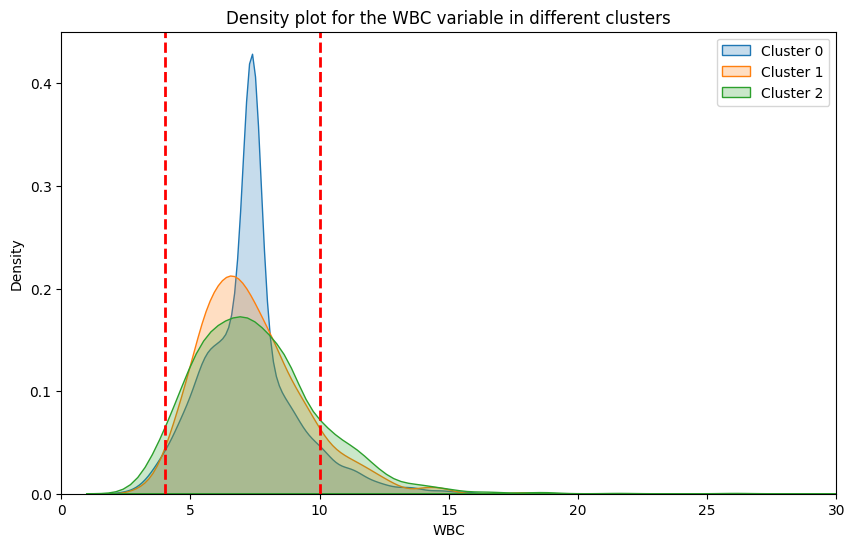

In [181]:
plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    sns.kdeplot(df_lek[df_lek['Cluster'] == cluster_id]['WBC (1000/uL)'], label=f'Cluster {cluster_id}', shade=True)
plt.title('Density plot for the WBC variable in different clusters')
plt.xlabel('WBC')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 30)
#plt.axvspan(4, 10, color='red', alpha=0.3)

plt.axvline(x=4, color='red', linestyle='--', linewidth=2)
plt.axvline(x=10, color='red', linestyle='--', linewidth=2)

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_Density_WBC.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_Density_WBC.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_Density_WBC.png')

plt.show()

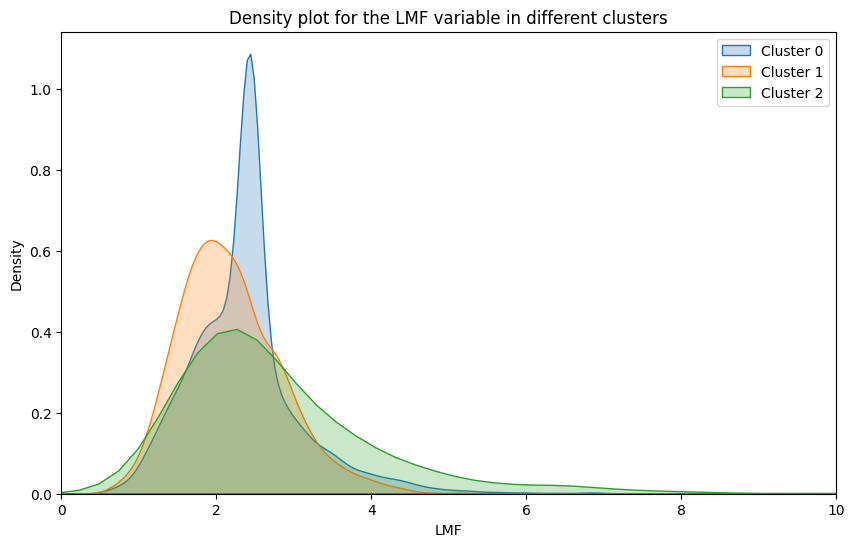

In [182]:
plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    sns.kdeplot(df_lek[df_lek['Cluster'] == cluster_id]['LMF (1000/uL)'], label=f'Cluster {cluster_id}', shade=True)
plt.title('Density plot for the LMF variable in different clusters')
plt.xlabel('LMF')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 10)
#plt.axvspan(1.0, 4.8, color='red', alpha=0.3)

#plt.axvline(x=1.0, color='red', linestyle='--', linewidth=2)
#plt.axvline(x=4.8, color='red', linestyle='--', linewidth=2)


plt.show()

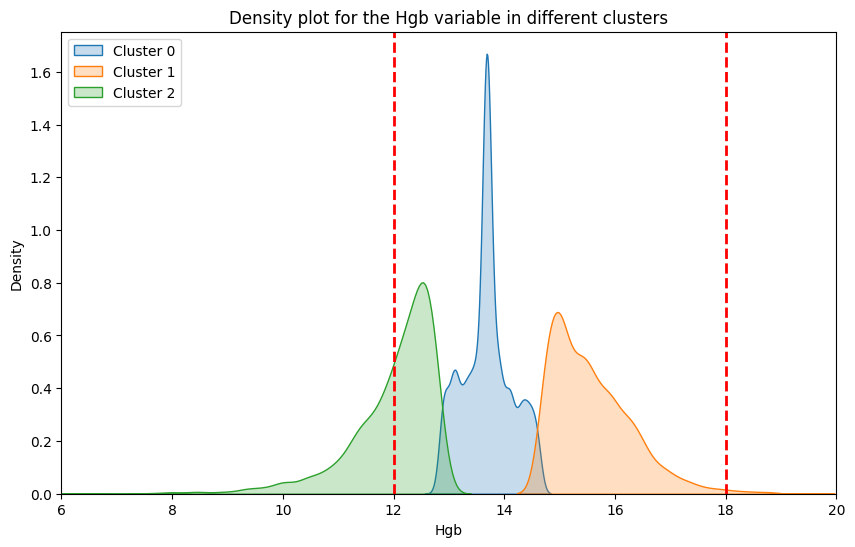

In [183]:
plt.figure(figsize=(10, 6))
for cluster_id in range(3):
    sns.kdeplot(df_lek[df_lek['Cluster'] == cluster_id]['Hb (g/dl)'], label=f'Cluster {cluster_id}', shade=True)
plt.title('Density plot for the Hgb variable in different clusters')
plt.xlabel('Hgb')
plt.ylabel('Density')
plt.legend()
plt.xlim(6, 20)
#plt.axvspan(12, 18, color='red', alpha=0.3)

plt.axvline(x=12, color='red', linestyle='--', linewidth=2)
plt.axvline(x=18, color='red', linestyle='--', linewidth=2)

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_Density_Hb.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_Density_Hb.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_Density_Hb.png')

plt.show()

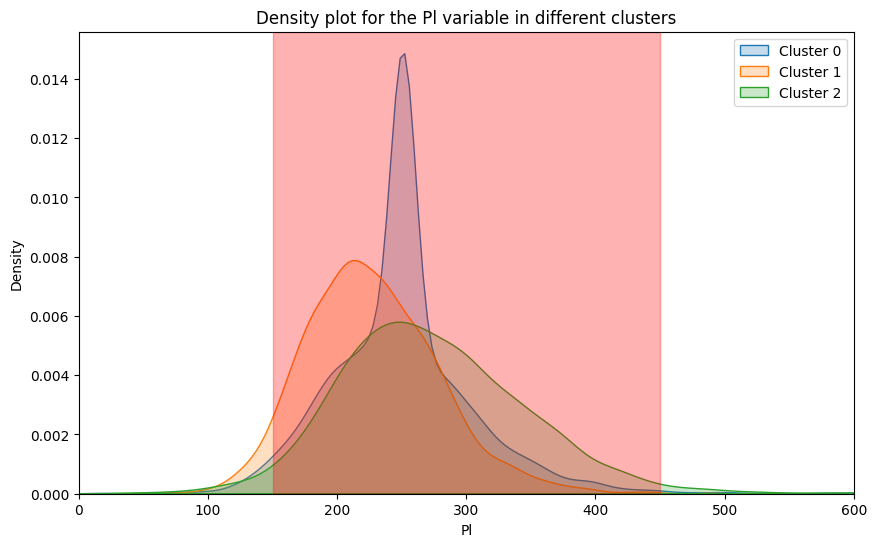

In [184]:
plt.figure(figsize=(10, 6))
for cluster_id in range(4):
    sns.kdeplot(df_lek[df_lek['Cluster'] == cluster_id]['Pl (1000/uL)'], label=f'Cluster {cluster_id}', shade=True)
plt.title('Density plot for the Pl variable in different clusters')
plt.xlabel('Pl')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 600)
plt.axvspan(150, 450, color='red', alpha=0.3)
plt.show()

In [185]:
#I check how many observations with WBC > 10 are in each cluster.
df_lek['WBC_10'] = df_lek['WBC (1000/uL)'] > 10

cluster_counts_WBC_lek = df_lek.groupby('Cluster')['WBC_10'].sum()

print("\nNumber of points in each cluster where WBC (1000/uL) > 10 before standardization:")
print(cluster_counts_WBC_lek)


Number of points in each cluster where WBC (1000/uL) > 10 before standardization:
Cluster
0    379
1    224
2    354
Name: WBC_10, dtype: int64


In [186]:
#I check how many observations with Hb < 12 are in each cluster.
df_lek['Hb_12'] = df_lek['Hb (g/dl)'] < 12

cluster_counts_Hb_12_lek = df_lek.groupby('Cluster')['Hb_12'].sum()

print("\nNumber of points in each cluster where Hb (g/dl) < 12 before standardization:")
print(cluster_counts_Hb_12_lek)


Number of points in each cluster where Hb (g/dl) < 12 before standardization:
Cluster
0      0
1      0
2    892
Name: Hb_12, dtype: int64


In [187]:
#I check how many observations with LMF < 1 are in each cluster.
df_lek['LMF_1'] = df_lek['LMF (1000/uL)'] < 1

cluster_counts_LMF_1_lek = df_lek.groupby('Cluster')['LMF_1'].sum()

print("\nNumber of points in each cluster where LMF (1000/uL) < 1 before standardization:")
print(cluster_counts_LMF_1_lek)


Number of points in each cluster where LMF (1000/uL) < 1 before standardization:
Cluster
0    40
1    26
2    44
Name: LMF_1, dtype: int64


In [188]:
#I check how many observations with Pl < 150 are in each cluster.
df_lek['Pl_150'] = df_lek['Pl (1000/uL)'] < 150

cluster_counts_Pl_150_lek = df_lek.groupby('Cluster')['Pl_150'].sum()

print("\nNumber of points in each cluster where Pl (1000/uL) < 150 before standardization:")
print(cluster_counts_Pl_150_lek)


Number of points in each cluster where Pl (1000/uL) < 150 before standardization:
Cluster
0    124
1    100
2     62
Name: Pl_150, dtype: int64


In [189]:
for cluster_id in df_lek['Cluster'].unique():
    count = len(df_lek[(df_lek['Cluster'] == cluster_id) & (df_lek['WBC (1000/uL)'] > 10) & (df_lek['Hb (g/dl)'] < 12) ])
    print(f'Cluster {cluster_id}: {count} cases that meet the conditions')

Cluster 1: 0 cases that meet the conditions
Cluster 2: 133 cases that meet the conditions
Cluster 0: 0 cases that meet the conditions


I assume that clustering using the k-means algorithm is largely satisfactory. The distributions of parameters such as WBC, Hg indicate that cluster no. = 2 best fits the profile of people potentially suffering from leukemia, because all cases meeting the given conditions (133) are in cluster no. = 2. I therefore assume that cluster no. = 2 contains people with suspected leukemia.

4.5. Building a simple classifier of whether a given patient has leukemia. Below are several classifiers for which different sets of hyperparameters were tested.

 I consider all cases from cluster no. = 2 (133) to be people suffering from leukemia and assign them a label of 1. From clusters 1 and 0 I draw 133 cases and assign them a label of 0 - considering that these are people who do not potentially suffer from leukemia.

In [190]:
cluster2_data_lek = df_lek[(df_lek['Cluster'] == 2) & (df_lek['WBC (1000/uL)'] > 10) & (df_lek['Hb (g/dl)'] < 12)].copy()
cluster2_data_lek['Leukemia'] = 1

In [191]:
#I select 66 cases from cluster no. 1, where I consider there are no cases of leukemia
cluster1_data_lek = df_lek[df_lek['Cluster'] == 1].copy()
cluster1_data_lek['Leukemia'] = 0
cluster1_data_lek = cluster1_data_lek.sample(n = 100, random_state = 42)

In [192]:
#I select 67 cases from cluster no. 0, where I consider there are no cases with leukemia
cluster0_data_lek = df_lek[df_lek['Cluster'] == 0].copy()
cluster0_data_lek['Leukemia'] = 0
cluster0_data_lek = cluster0_data_lek.sample(n = 90, random_state = 42)

In [193]:
#combines all data i.e. from cluster 1.0 and 2.
df_data_lek = pd.concat([cluster2_data_lek, cluster1_data_lek, cluster0_data_lek], axis=0)

In [194]:
df_data_lek.head()

,gender,Hb (g/dl),Pl (1000/uL),WBC (1000/uL),RBC (mln/ul),NEU (1000/uL),LMF (1000/uL),Cluster,Cluster_dbscan,WBC_10,Hb_12,LMF_1,Pl_150,Leukemia
SEQN,,,,,,,,,,,,,,
73558,1,11.9,314.0,12.6,3.84,7.4,3.4,2,-1,True,True,False,False,1
73967,1,11.8,303.0,10.6,4.32,6.6,3.1,2,-1,True,True,False,False,1
73986,2,11.6,328.0,10.2,4.51,6.9,2.6,2,-1,True,True,False,False,1
74020,2,11.4,228.0,13.0,3.97,7.8,3.3,2,-1,True,True,False,False,1
74066,1,11.8,325.0,10.1,4.42,5.2,2.7,2,-1,True,True,False,False,1


In [195]:
df_data_lek = df_data_lek.drop(columns = ['Cluster',
                                          'gender',
                                          'WBC_10',
                                          'Hb_12',
                                          'LMF_1',
                                          'Pl_150',
                                          'Cluster_dbscan'
                                          ])

In [196]:
df_data_lek.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323 entries, 73558 to 74900
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hb (g/dl)      323 non-null    float64
 1   Pl (1000/uL)   323 non-null    float64
 2   WBC (1000/uL)  323 non-null    float64
 3   RBC (mln/ul)   323 non-null    float64
 4   NEU (1000/uL)  323 non-null    float64
 5   LMF (1000/uL)  323 non-null    float64
 6   Leukemia       323 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 20.2 KB


In [197]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_lek = df_data_lek.drop(columns=['Leukemia'])
Y_lek = df_data_lek['Leukemia']

X_train_lek, X_test_lek, Y_train_lek, Y_test_lek = train_test_split(X_lek, Y_lek, test_size=0.2, random_state=42)

4.5.1. Decision tree.

In [198]:
tree_lek = DecisionTreeClassifier(max_depth = 4,
                              random_state = 0,
                              min_samples_leaf = 100,
                              min_samples_split = 10,
                              ccp_alpha = 0.1,
                              #max_features='sqrt',
                              criterion = 'gini')


cv_scores_lek = cross_val_score(tree_lek, X_train_lek, Y_train_lek, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores_lek}')
print(f'Mean CV accuracy: {cv_scores_lek.mean():.2f}')
print(f'Standard deviation of CV accuracy: {cv_scores_lek.std():.2f}')

Cross-validation scores: [0.92307692 0.88461538 0.92307692 0.90196078 0.92156863]
Mean CV accuracy: 0.91
Standard deviation of CV accuracy: 0.02


In [199]:
# Training the model on the entire training set
tree_lek.fit(X_train_lek, Y_train_lek)

y_pred_lek = tree_lek.predict(X_test_lek)

# Model evaluation
accuracy_rf_lek = accuracy_score(Y_test_lek, y_pred_lek)
print(f'Tree Accuracy: {accuracy_rf_lek:.2f}')

print('\nTree Classification Report:')
print(classification_report(Y_test_lek, y_pred_lek))

conf_matrix_lek = confusion_matrix(Y_test_lek, y_pred_lek)
print("Confusion Matrix:")
print(conf_matrix_lek)

Tree Accuracy: 1.00

Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        31

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

Confusion Matrix:
[[34  0]
 [ 0 31]]


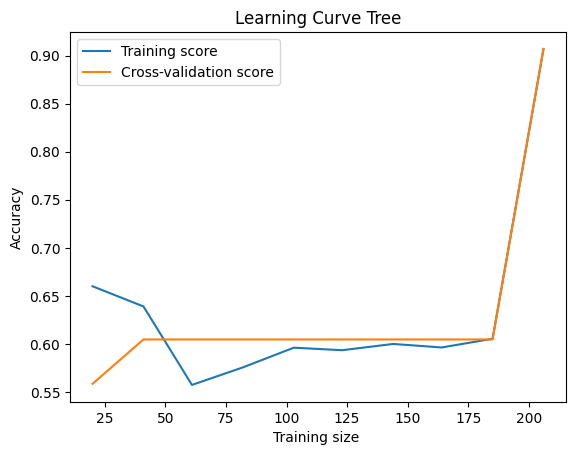

In [200]:
from sklearn.model_selection import learning_curve


train_sizes1, train_scores1, test_scores1 = learning_curve(tree_lek, X_train_lek, Y_train_lek, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean1 = np.mean(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)

plt.plot(train_sizes1, train_scores_mean1, label='Training score')
plt.plot(train_sizes1, test_scores_mean1, label='Cross-validation score')
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve Tree')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC1.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC1.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC1.png')



plt.show()

AUC: 1.00


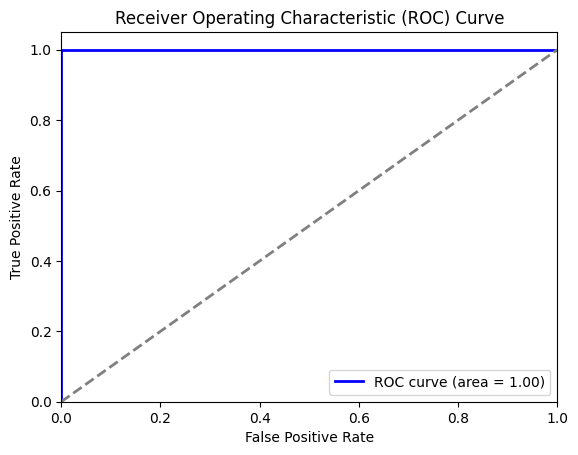

In [201]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = tree_lek.predict_proba(X_test_lek)[:, 1]

# Calculating FPR, TPR and decision thresholds
fpr, tpr, thresholds = roc_curve(Y_test_lek, y_pred_prob)

# Calculating AUC
auc = roc_auc_score(Y_test_lek, y_pred_prob)
print(f'AUC: {auc:.2f}')

# Drawing the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The results obtained for cross-validation are close to the results on the training set. In addition, we have ROC = 1 and AUC = 1 and a high accuracy score. This may mean that the model is over-trained or the problem is too simple and the model copes with it perfectly.

4.5.2. Random forest.

In [202]:
tree_lek2 = RandomForestClassifier(max_depth = 4,
                              random_state = 0,
                              min_samples_leaf = 100,
                              min_samples_split = 10,
                              ccp_alpha = 0.1,
                              #max_features='sqrt',
                              criterion = 'gini')


cv_scores_lek2 = cross_val_score(tree_lek2, X_train_lek, Y_train_lek, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores_lek2}')
print(f'Mean CV accuracy: {cv_scores_lek2.mean():.2f}')
print(f'Standard deviation of CV accuracy: {cv_scores_lek2.std():.2f}')

Cross-validation scores: [0.61538462 0.59615385 0.59615385 0.60784314 0.60784314]
Mean CV accuracy: 0.60
Standard deviation of CV accuracy: 0.01


In [203]:
# Training the model on the entire training set
tree_lek2.fit(X_train_lek, Y_train_lek)

y_pred_lek2 = tree_lek2.predict(X_test_lek)

# Model evaluation
accuracy_rf_lek2 = accuracy_score(Y_test_lek, y_pred_lek)
print(f'Tree Accuracy: {accuracy_rf_lek2:.2f}')

print('\nTree Classification Report:')
print(classification_report(Y_test_lek, y_pred_lek))

conf_matrix_lek2 = confusion_matrix(Y_test_lek, y_pred_lek)
print("Confusion Matrix:")
print(conf_matrix_lek2)

Tree Accuracy: 1.00

Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        31

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

Confusion Matrix:
[[34  0]
 [ 0 31]]


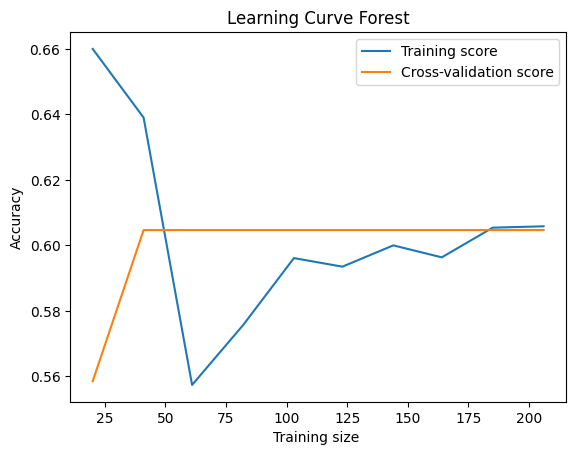

In [204]:
from sklearn.model_selection import learning_curve


train_sizes2, train_scores2, test_scores2 = learning_curve(tree_lek2, X_train_lek, Y_train_lek, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean2 = np.mean(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)

plt.plot(train_sizes2, train_scores_mean2, label='Training score')
plt.plot(train_sizes2, test_scores_mean2, label='Cross-validation score')
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve Forest')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC2.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC2.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC2.png')



plt.show()

AUC: 0.50


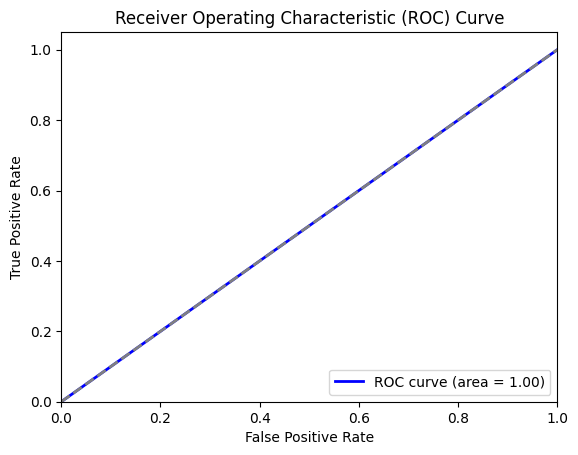

In [205]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob2 = tree_lek2.predict_proba(X_test_lek)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test_lek, y_pred_prob2)


auc2 = roc_auc_score(Y_test_lek, y_pred_prob2)
print(f'AUC: {auc2:.2f}')


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The AUC value indicates that I have obtained a random classifier, which means that it has no ability to discriminate. I reject this model.

4.5.3. Gradient Boosting Classifier

In [206]:
tree_lek3 = GradientBoostingClassifier(n_estimators=200,
                                       learning_rate=0.05,
                                       max_depth=2,
                                       min_samples_split=5,
                                       min_samples_leaf=2,
                                       subsample=0.8,
                                       #max_features='sqrt'
                                       )


cv_scores_lek3 = cross_val_score(tree_lek2, X_train_lek, Y_train_lek, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores_lek3}')
print(f'Mean CV accuracy: {cv_scores_lek3.mean():.2f}')
print(f'Standard deviation of CV accuracy: {cv_scores_lek3.std():.2f}')

Cross-validation scores: [0.61538462 0.59615385 0.59615385 0.60784314 0.60784314]
Mean CV accuracy: 0.60
Standard deviation of CV accuracy: 0.01


In [207]:

tree_lek3.fit(X_train_lek, Y_train_lek)

y_pred_lek3 = tree_lek3.predict(X_test_lek)


accuracy_rf_lek3 = accuracy_score(Y_test_lek, y_pred_lek)
print(f'Tree Accuracy: {accuracy_rf_lek3:.2f}')

print('\nTree Classification Report:')
print(classification_report(Y_test_lek, y_pred_lek))

conf_matrix_lek3 = confusion_matrix(Y_test_lek, y_pred_lek)
print("Confusion Matrix:")
print(conf_matrix_lek3)

Tree Accuracy: 1.00

Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        31

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

Confusion Matrix:
[[34  0]
 [ 0 31]]


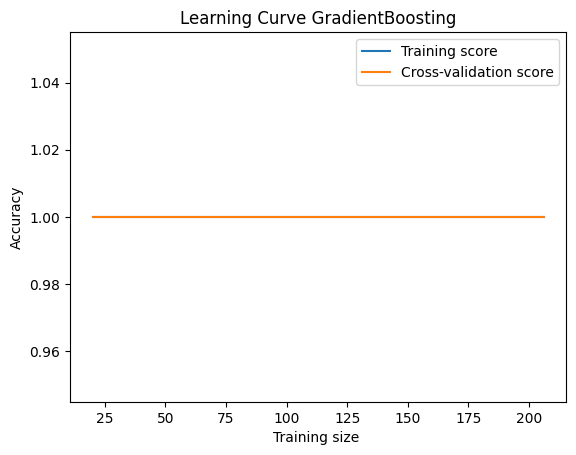

In [208]:
from sklearn.model_selection import learning_curve


train_sizes3, train_scores3, test_scores3 = learning_curve(tree_lek3, X_train_lek, Y_train_lek, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean3 = np.mean(train_scores3, axis=1)
test_scores_mean3 = np.mean(test_scores3, axis=1)

plt.plot(train_sizes3, train_scores_mean3, label='Training score')
plt.plot(train_sizes3, test_scores_mean3, label='Cross-validation score')
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve GradientBoosting')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC3.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC3.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC3.png')



plt.show()

AUC: 1.00


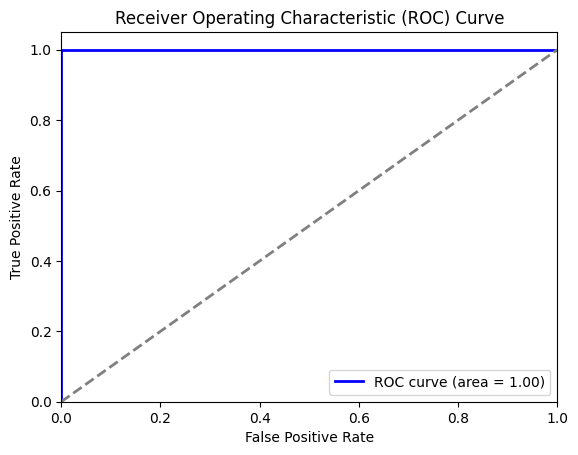

In [209]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob3 = tree_lek3.predict_proba(X_test_lek)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test_lek, y_pred_prob3)


auc3 = roc_auc_score(Y_test_lek, y_pred_prob3)
print(f'AUC: {auc3:.2f}')


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In this case, a significant difference between the cross-validation results and the test set results indicates that the model is overfitting. So I reject this model.

In [210]:
from sklearn.neural_network import MLPClassifier

mlp_lek = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 1), activation='relu', solver='adam', alpha=0.0001,
                      batch_size='auto', learning_rate='constant', max_iter=200, random_state=42)
mlp_lek.fit(X_train_lek, Y_train_lek)

y_pred_mlp_lek = mlp_lek.predict(X_test_lek)

accuracy_mlp_lek = accuracy_score(Y_test_lek, y_pred_mlp_lek)
print(f'MLP Accuracy: {accuracy_mlp_lek:.2f}')

print('\nMLP Classification Report:')
print(classification_report(Y_test_lek, y_pred_mlp_lek))

conf_matrix_mlp_lek = confusion_matrix(Y_test_lek, y_pred_lek)
print("Confusion Matrix:")
print(conf_matrix_mlp_lek)

MLP Accuracy: 0.52

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        34
           1       0.00      0.00      0.00        31

    accuracy                           0.52        65
   macro avg       0.26      0.50      0.34        65
weighted avg       0.27      0.52      0.36        65

Confusion Matrix:
[[34  0]
 [ 0 31]]


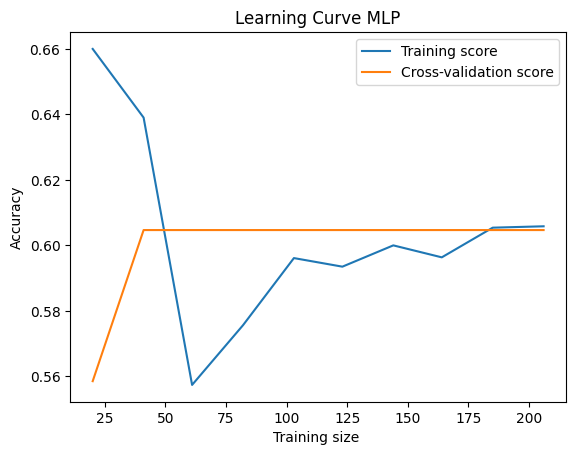

In [211]:
from sklearn.model_selection import learning_curve


train_sizes4, train_scores4, test_scores4 = learning_curve(mlp_lek, X_train_lek, Y_train_lek, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean4 = np.mean(train_scores4, axis=1)
test_scores_mean4 = np.mean(test_scores4, axis=1)

plt.plot(train_sizes4, train_scores_mean4, label='Training score')
plt.plot(train_sizes4, test_scores_mean4, label='Cross-validation score')
plt.xlabel('Training size ')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve MLP')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC4.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC4.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_LC4.png')



plt.show()

AUC: 0.50


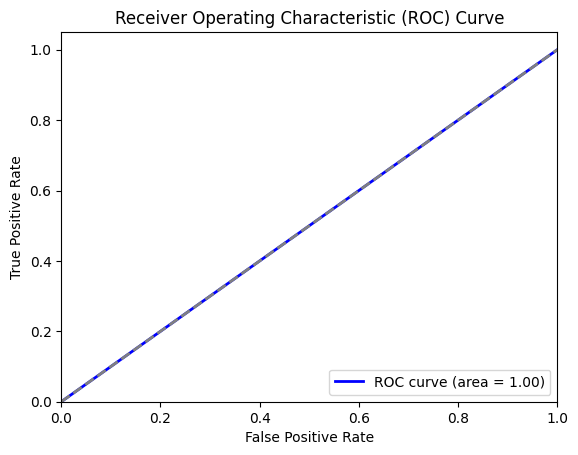

In [212]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob_mlp = mlp_lek.predict_proba(X_test_lek)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test_lek, y_pred_prob_mlp)


auc_mlp = roc_auc_score(Y_test_lek, y_pred_prob_mlp)
print(f'AUC: {auc_mlp:.2f}')


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The cross-validation results are significantly lower than those for the original test set. Furthermore, its high accuracy and large ROC and AUC values ​​indicate overfitting. Therefore, I reject this model.

Validation of the decision tree model on randomly generated data containing blood results for leukemia and label.

In [213]:
df = pd.read_csv('/content/drive/MyDrive/Projekt Własny/DANE/DATA,CSV/synthetic_leukemia_data.csv')

In [214]:
X_new_lek_los = df.drop(columns=['Leukemia'])
y_new_lek_los = df['Leukemia']

In [215]:
y_pred_new_lek_los = tree_lek.predict(X_new_lek_los)

accuracy_new_lek_los = accuracy_score(y_new_lek_los, y_pred_new_lek_los)
conf_matrix_new_lek_los = confusion_matrix(y_new_lek_los, y_pred_new_lek_los)
class_report_new_lek_los = classification_report(y_new_lek_los, y_pred_new_lek_los)

print(f"Accuracy on data_anemia: {accuracy_new_lek_los * 100:.2f}%")
print("Confusion Matrix on data_anemia:")
print(conf_matrix_new_lek_los)
print("Classification Report on data_anemia:")
print(class_report_new_lek_los)

Accuracy on data_anemia: 85.90%
Confusion Matrix on data_anemia:
[[458  74]
 [ 67 401]]
Classification Report on data_anemia:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       532
           1       0.84      0.86      0.85       468

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



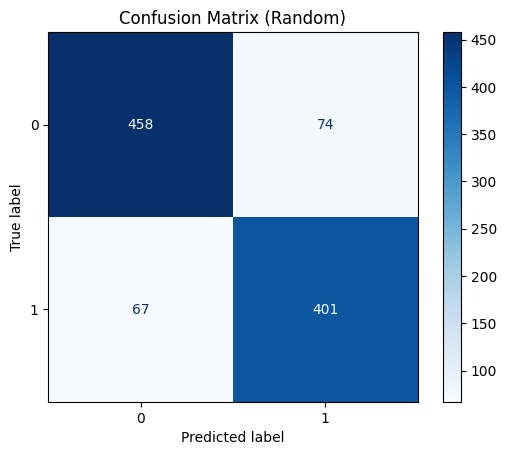

In [216]:
cm_41 = confusion_matrix(y_new_lek_los, y_pred_new_lek_los)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_41, display_labels=tree_lek.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random)')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_CM1.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_CM1.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_CM1.png')

plt.show()

Checking for another data set (incl. family, mine).

In [217]:
data_leukemia = pd.DataFrame({
    'Hb (g/dl)' : [12.2, 3.1, 9.2, 9.3, 7.5, 12, 13.3, 15.2, 14.5, 14],
    'Pl (1000/uL)': [143, 120, 100, 43, 64, 256, 251, 177, 370, 279],
    'WBC (1000/uL)': [569.9, 304, 539, 323, 216, 6.7, 4.11, 12.93, 7.6, 8.0],
    'RBC (mln/ul)': [3.7, 1.6, 3.5, 2.98, 3.3, 3.3, 4.61, 4.67, 4.68, 4.5],
    'NEU (1000/uL)': [1.0, 121, 50, 1.5, 97, 4, 2.31, 9.91, 3.3, 4.9],
    'LMF (1000/uL)': [1.1, 285, 150, 2.2, 90, 2, 1.13, 14, 3.4, 2.6],
    'Leukemia': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]})

In [218]:
X_new_lek_2 = data_leukemia.drop(columns=['Leukemia'])
y_new_lek_2 = data_leukemia['Leukemia']

y_pred_new_lek_2 = tree_lek.predict(X_new_lek_2)

accuracy_new_44 = accuracy_score(y_new_lek_2, y_pred_new_lek_2)
conf_matrix_new_44 = confusion_matrix(y_new_lek_2, y_pred_new_lek_2)
class_report_new_44 = classification_report(y_new_lek_2, y_pred_new_lek_2)

print(f"Accuracy on data_anemia: {accuracy_new_44 * 100:.2f}%")
print("Confusion Matrix on data_anemia:")
print(conf_matrix_new_44)
print("Classification Report on data_anemia:")
print(class_report_new_44)

Accuracy on data_anemia: 90.00%
Confusion Matrix on data_anemia:
[[4 1]
 [0 5]]
Classification Report on data_anemia:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



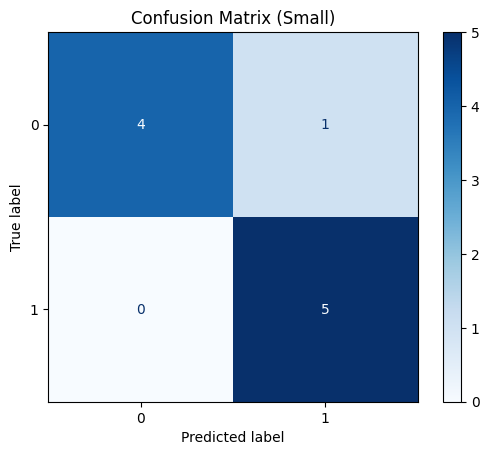

In [219]:
cm_42 = confusion_matrix(y_new_lek_2, y_pred_new_lek_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_42, display_labels=tree_lek.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Small)')

#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_CM2.eps')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_CM2.jpg')
#plt.savefig('/content/drive/MyDrive/Projekt Własny/Wykresy/Leukemia_CM2.png')

plt.show()

#Summary

Data was prepared for three selected diseases: anemia, diabetes, and leukemia. Appropriate features most characteristic of each disease were selected. In cases where labels (whether someone is sick or not) were missing, clustering was performed, and based on the clustering results, labels were assigned to individual observations. Then, three classifiers were built and tested on additional datasets due to concerns about overfitting. Predictions on new datasets showed that the classifiers performed satisfactorily, with a high accuracy rate, and were able to classify whether someone might be sick or not. In further work on the project, the dataset could be expanded to include additional years, more features could be selected for model building, and new models for other diseases could be attempted.